<a href="https://colab.research.google.com/github/SandunGitHub/UOM_Research/blob/create-Feature_Engineering/Analysis_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mount the google drive

In [ ]:
#import the relevant libaries
import cv2
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import logging
import os
from google.colab import drive
# import morphsnakes as ms
from skimage.color import rgb2gray
from imageio import imread
import time
import skimage.feature
from skimage import data, img_as_float
from skimage.segmentation import (morphological_chan_vese,
                                  morphological_geodesic_active_contour,
                                  inverse_gaussian_gradient,
                                  checkerboard_level_set)

# drive.mount('/content/drive')




segmentation of the images

In [ ]:
pip install morphsnakes

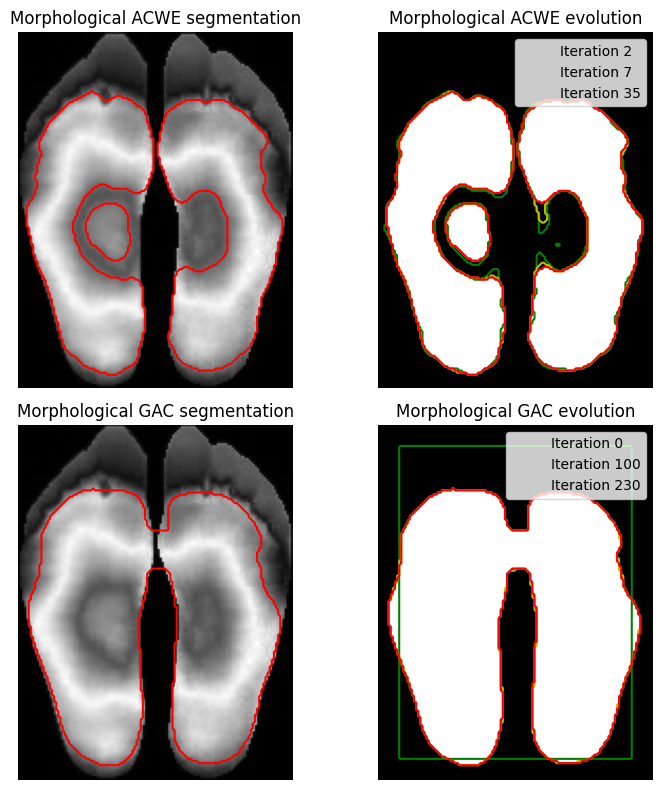

In [ ]:
#The following image segmentation may segment the areas of high risk but may miss out teh most of the areas
def store_evolution_in(lst):
    """Returns a callback function to store the evolution of the level sets in
    the given list.
    """

    def _store(x):
        lst.append(np.copy(x))

    return _store


# Morphological ACWE

image = plt.imread('/content/drive/MyDrive/Analysis_Code/allfoot.jpg')
image = rgb2gray(image)
image = img_as_float(image)

# Initial level set
init_ls = checkerboard_level_set(image.shape, 6)
# List with intermediate results for plotting the evolution
evolution = []
callback = store_evolution_in(evolution)
ls = morphological_chan_vese(image, num_iter=35, init_level_set=init_ls,
                             smoothing=3, iter_callback=callback)

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
ax = axes.flatten()

ax[0].imshow(image, cmap="gray")
ax[0].set_axis_off()
ax[0].contour(ls, [0.5], colors='r')
ax[0].set_title("Morphological ACWE segmentation", fontsize=12)

ax[1].imshow(ls, cmap="gray")
ax[1].set_axis_off()
contour = ax[1].contour(evolution[2], [0.5], colors='g')
contour.collections[0].set_label("Iteration 2")
contour = ax[1].contour(evolution[7], [0.5], colors='y')
contour.collections[0].set_label("Iteration 7")
contour = ax[1].contour(evolution[-1], [0.5], colors='r')
contour.collections[0].set_label("Iteration 35")
ax[1].legend(loc="upper right")
title = "Morphological ACWE evolution"
ax[1].set_title(title, fontsize=12)


# Morphological GAC
image = plt.imread('/content/drive/MyDrive/Analysis_Code/allfoot.jpg')
image = rgb2gray(image)
gimage = inverse_gaussian_gradient(image)

# Initial level set
init_ls = np.zeros(image.shape, dtype=np.int8)
init_ls[10:-10, 10:-10] = 1
# List with intermediate results for plotting the evolution
evolution = []
callback = store_evolution_in(evolution)
ls = morphological_geodesic_active_contour(gimage, num_iter=230,
                                           init_level_set=init_ls,
                                           smoothing=1, balloon=-1,
                                           threshold=0.69,
                                           iter_callback=callback)

ax[2].imshow(image, cmap="gray")
ax[2].set_axis_off()
ax[2].contour(ls, [0.5], colors='r')
ax[2].set_title("Morphological GAC segmentation", fontsize=12)

ax[3].imshow(ls, cmap="gray")
ax[3].set_axis_off()
contour = ax[3].contour(evolution[0], [0.5], colors='g')
contour.collections[0].set_label("Iteration 0")
contour = ax[3].contour(evolution[100], [0.5], colors='y')
contour.collections[0].set_label("Iteration 100")
contour = ax[3].contour(evolution[-1], [0.5], colors='r')
contour.collections[0].set_label("Iteration 230")
ax[3].legend(loc="upper right")
title = "Morphological GAC evolution"
ax[3].set_title(title, fontsize=12)

fig.tight_layout()
plt.show()

Recommendation use an algorithm which can both segment the images accuractly

Easy recommendation:

1. Use Canny edge detection to specify region of interest and use it as outline


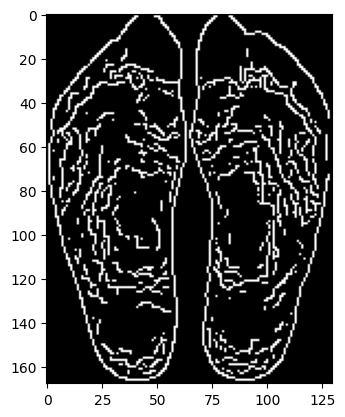

In [ ]:
#Depnding on the thresholds it will have missegemnetation
# Load the input image
image = plt.imread('/content/drive/MyDrive/Analysis_Code/allfoot.jpg')

# Convert the image to grayscale
gray = skimage.color.rgb2gray(image)

# Perform Canny edge detection
edges = skimage.feature.canny(gray,0.1,0.2)

# Display the edge-detected image
plt.imshow(edges, cmap='gray')
plt.show()


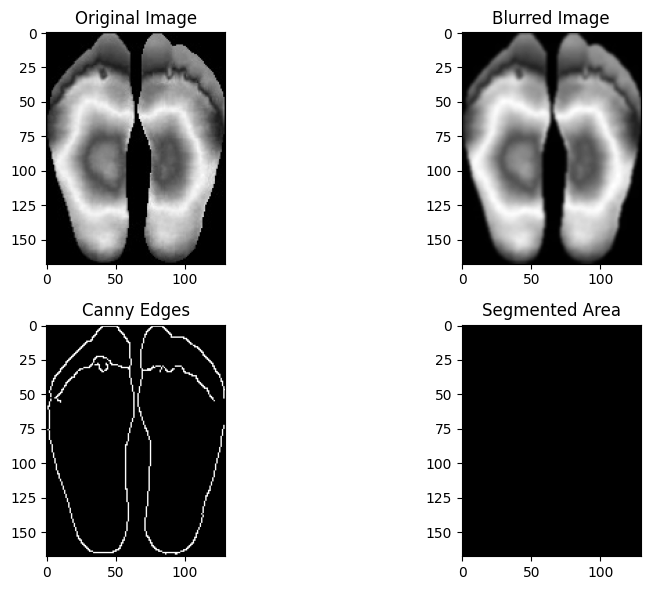

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Read the image
image = cv2.imread('/content/drive/MyDrive/Analysis_Code/allfoot.jpg', cv2.IMREAD_GRAYSCALE)

# Apply GaussianBlur to reduce noise and help Canny edge detection
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Apply Canny edge detection
edges = cv2.Canny(blurred, 50, 150)

# Find contours in the edges
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Optional: Filter contours based on area to focus on a specific region
min_contour_area = 1000
filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_contour_area]

# Create a mask to visualize the segmented area
mask = np.zeros_like(image)
cv2.drawContours(mask, filtered_contours, -1, (255), thickness=cv2.FILLED)

# Apply the mask to the original image
result = cv2.bitwise_and(image, image, mask=mask)

# Display the results using Matplotlib
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(blurred, cmap='gray')
plt.title('Blurred Image')

plt.subplot(2, 2, 3)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edges')

plt.subplot(2, 2, 4)
plt.imshow(result, cmap='gray')
plt.title('Segmented Area')

plt.tight_layout()
plt.show()


Feet detection
Need to implement an algorithm capable of segmenting and detecting the foot at
the same time

Recommendation
Mask R-CNN
Fully CNN for semantic segmentation

References:
[1]	J. Long, E. Shelhamer, and T. Darrell, “Fully Convolutional Networks for Semantic Segmentation,” Nov. 2014, [Online]. Available: http://arxiv.org/abs/1411.4038
[2]	K. He, G. Gkioxari, P. Dollár, and R. Girshick, “Mask R-CNN,” Mar. 2017, [Online]. Available: http://arxiv.org/abs/1703.06870





In [ ]:
# prompt:
#https://github.com/facebookresearch/Detectron.
#F-RCNN checked
#runnig a pretrained model on the images


In [ ]:
!python -m pip install pyyaml==5.1
import sys, os, distutils.core
# Note: This is a faster way to install detectron2 in Colab, but it does not include all functionalities (e.g. compiled operators).
# See https://detectron2.readthedocs.io/tutorials/install.html for full installation instructions
!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))

# Properly install detectron2. (Please do not install twice in both ways)
# !python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 kB 6.9 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Cloning into 'detectron2'...
remote: Enumerating objects: 15526, done.
remote: Counting objects: 100% (251/251), done.
remote: Compressing objects: 100% (197/197), done.
remote: Total 15526 (delta 80), reused 194 (delta 54), pack-reused 15275
Receiving objects: 100% (15526/15526), 6.40 MiB | 17.47 MiB/s, done.
Resolving deltas: 100% (11195/11195), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.9 MB/s eta 0:00:

In [ ]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0
torch:  2.2 ; cuda:  cu121
detectron2: 0.6


In [ ]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

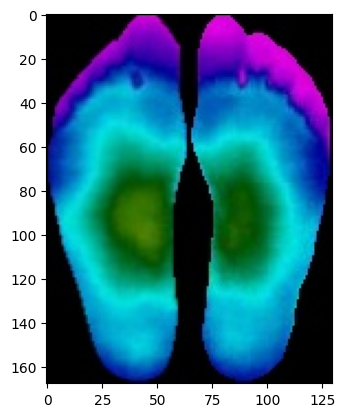

In [ ]:
im = plt.imread("/content/drive/MyDrive/Analysis_Code/allfoot.jpg")
plt.imshow(im)

In [ ]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

[04/02 05:12:45 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...


model_final_f10217.pkl: 178MB [00:00, 282MB/s]                           
/usr/local/lib/python3.10/dist-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3549.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [ ]:
# look at the outputs. See https://detectron2.readthedocs.io/tutorials/models.html#model-output-format for specification
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

tensor([], device='cuda:0', dtype=torch.int64)
Boxes(tensor([], device='cuda:0', size=(0, 4)))


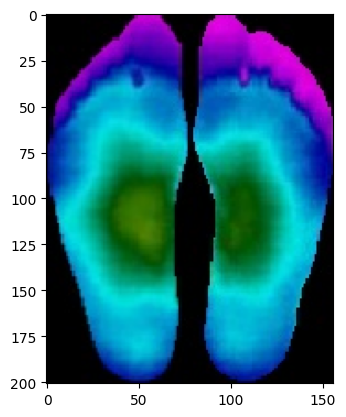

In [ ]:
# We can use `Visualizer` to draw the predictions on the image.
#pretrined model not sucessful lets train with the custom model

v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.imshow(out.get_image()[:, :, ::-1])

In [ ]:
# To run the code we need to have a GPU which quite a compuatatioinally expensive
# Therefore, we need to proceed to a different approach
# Moving to a simple classificaton trechnique


Considering the effectiveness and simplicity, we need more optimized versions
1. Use of clustering algorithms (K-Means)
2. SuperPixel Method
3. Graph method
4. Deep learning with lightweight architechtures (MobileNet, SqeeshNet)


In [ ]:
#Training and testing time in GPU: ess than 34.02829313278198 seconds





VGG semantic annotator

Lets test it on the K means color segmentation algorithm
Refering to the Image Segementation as per tendorflow documentation
https://www.tensorflow.org/tutorials/images/segmentation




Lodiing all the necessary files and libraries

In [ ]:
pip install --upgrade imutils

In [ ]:
import os
import pandas as pd
import numpy as np


CG_directory_LPA_All = '/content/drive/MyDrive/Left_Foot_LPA/CG'
DM_directory_LPA_All = '/content/drive/MyDrive/Left_Foot_LPA/DM'
CG_directory_MPA_All = '/content/drive/MyDrive/Left_Foot_MPA/CG'
DM_directory_MPA_All = '/content/drive/MyDrive/Left_Foot_MPA/DM'
CG_directory_LCA_All = '/content/drive/MyDrive/Left_Foot_LCA/Left_Foot_LCA/CG'
DM_directory_LCA_All = '/content/drive/MyDrive/Left_Foot_LCA/Left_Foot_LCA/DM'
CG_directory_MCA_All = '/content/drive/MyDrive/Left_Foot_MCA/CG'
DM_directory_MCA_All = '/content/drive/MyDrive/Left_Foot_MCA/DM'
CG_directory_Left_All = '/content/drive/MyDrive/All_Foot/CG'
DM_directory_Left_All = '/content/drive/MyDrive/All_Foot/DM'


CG_directory_LPA_ALL_ = os.listdir(CG_directory_LPA_All)
DM_directory_LPA_ALL_ = os.listdir(DM_directory_LPA_All)
CG_directory_MPA_ALL_ = os.listdir(CG_directory_MPA_All)
DM_directory_MPA_ALL_ = os.listdir(DM_directory_MPA_All)
CG_directory_LCA_ALL_  = os.listdir(CG_directory_LCA_All)
DM_directory_LCA_ALL_ =  os.listdir(DM_directory_LCA_All)
CG_directory_MCA_ALL_  = os.listdir(CG_directory_MCA_All)
DM_directory_MCA_ALL_ =  os.listdir(DM_directory_MCA_All)
CG_directory_Left_All_Foot_  = os.listdir(CG_directory_Left_All)
DM_directory_Left_All_Foot_ =  os.listdir(DM_directory_Left_All)


CG_csv_files_LPA_L   = [filename for filename in CG_directory_LPA_ALL_ if '_L_' in filename and filename.endswith('.csv')]
DM_csv_files_LPA_L   = [filename for filename in DM_directory_LPA_ALL_ if '_L_' in filename and filename.endswith('.csv')]
CG_csv_files_MPA_L   = [filename for filename in CG_directory_MPA_ALL_ if 'L' in filename and filename.endswith('.csv')]
DM_csv_files_MPA_L   = [filename for filename in DM_directory_MPA_ALL_ if 'L' in filename and filename.endswith('.csv')]
CG_csv_files_LCA_L   = [filename for filename in CG_directory_LCA_ALL_ if '_L_' in filename and filename.endswith('.csv')]
DM_csv_files_LCA_L   = [filename for filename in DM_directory_LCA_ALL_ if '_L_' in filename and filename.endswith('.csv')]
CG_csv_files_MCA_L   = [filename for filename in CG_directory_MCA_ALL_ if 'L' in filename and filename.endswith('.csv')]
DM_csv_files_MCA_L   = [filename for filename in DM_directory_MCA_ALL_ if 'L' in filename and filename.endswith('.csv')]
CG_csv_files_ALL_L   = [filename for filename in CG_directory_Left_All_Foot_ if 'L' in filename and filename.endswith('.csv')]
DM_csv_files_ALL_L   = [filename for filename in DM_directory_Left_All_Foot_ if 'L' in filename and filename.endswith('.csv')]


CG_csv_files_LPA_R   = [filename for filename in CG_directory_LPA_ALL_ if '_R_' in filename and filename.endswith('.csv')]
DM_csv_files_LPA_R   = [filename for filename in DM_directory_LPA_ALL_ if '_R_' in filename and filename.endswith('.csv')]
CG_csv_files_MPA_R   = [filename for filename in CG_directory_MPA_ALL_ if 'R' in filename and filename.endswith('.csv')]
DM_csv_files_MPA_R   = [filename for filename in DM_directory_MPA_ALL_ if 'R' in filename and filename.endswith('.csv')]
CG_csv_files_LCA_R   = [filename for filename in CG_directory_LCA_ALL_ if '_R_' in filename and filename.endswith('.csv')]
DM_csv_files_LCA_R   = [filename for filename in DM_directory_LCA_ALL_ if '_R_' in filename and filename.endswith('.csv')]
CG_csv_files_MCA_R   = [filename for filename in CG_directory_MCA_ALL_ if 'R' in filename and filename.endswith('.csv')]
DM_csv_files_MCA_R   = [filename for filename in DM_directory_MCA_ALL_ if 'R' in filename and filename.endswith('.csv')]
CG_csv_files_ALL_R   = [filename for filename in CG_directory_Left_All_Foot_ if 'R' in filename and filename.endswith('.csv')]
DM_csv_files_ALL_R   = [filename for filename in DM_directory_Left_All_Foot_ if 'R' in filename and filename.endswith('.csv')]




CG = pd.read_csv('/content/drive/MyDrive/Plantar_Thermogram_DB_CG.csv')
DM = pd.read_csv('/content/drive/MyDrive/Plantar_Thermogram_DB_DM.csv')

Max_Temp_CG_Col_R = CG[['General_RF','LCA_RF','LPA_RF','MCA_RF','MPA_RF']]
Max_Temp_DM_Col_R = DM[['General_RF','LCA_RF','LPA_RF','MCA_RF','MPA_RF']]

Max_Temp_CG_Col_L = CG[['General_LF','LCA_LF','LPA_LF','MCA_LF','MPA_LF']]
Max_Temp_DM_Col_L = DM[['General_LF','LCA_LF','LPA_LF','MCA_LF','MPA_LF']]


Preprocessing the data and extracting relevant features in the left leg




In [ ]:
#height, weight and IMC  data of DM is missing
#repalcing them with their mean values
from typing import List
DM['Height (m)'] = DM['Height (m)'].fillna(DM['Height (m)'].mean())
DM[ 'Weight (Kg)'] = DM[ 'Weight (Kg)'].fillna(DM['Weight (Kg)'].mean())
DM['IMC'] = DM['IMC'].fillna(DM['IMC'].mean())
# # Adding a LCA_ET into dataframe
#adding extra freatures such as highest tempearture, Estimated Temperature, LPA_STD,  MPA_STD,  MCA_STD, LPA_ETD, LPS_ET, Fullfoot_ETD, LCA_ET, NRT (class 1 to class 5), MCA_HSE

Max_Temp_array_DM_L = []
Max_Temp_array_CG_L = []

#LPA
CG_LPA_L_Overall_Std_Dev = []
DM_LPA_L_Overall_Std_Dev =[]
CG_LPA_L_Average_Std_Dev = []
DM_LPA_L_Average_Std_Dev =[]
CG_LPA_L_Mean_Squared_Std_Dev = []
DM_LPA_L_Mean_Squared_Std_Dev =[]
CG_LCA_L_Overall_Std_Dev = []
DM_LCA_L_Overall_Std_Dev = []
CG_LCA_L_Average_Std_Dev = []
DM_LCA_L_Average_Std_Dev = []
CG_LCA_L_Mean_Squared_Std_Dev = []
DM_LCA_L_Mean_Squared_Std_Dev = []


CG_PCA_LPL_L_Dev =[]
DM_PCA_LPL_L_Dev = []
COMFIRM_ARRAY = []


#MPA
CG_MPA_L_Overall_Std_Dev = []
DM_MPA_L_Overall_Std_Dev =[]
CG_MPA_L_Average_Std_Dev = []
DM_MPA_L_Average_Std_Dev =[]
CG_MPA_L_Mean_Squared_Std_Dev = []
DM_MPA_L_Mean_Squared_Std_Dev =[]

#MCA
CG_MCA_L_Overall_Std_Dev = []
DM_MCA_L_Overall_Std_Dev =[]
CG_MCA_L_Average_Std_Dev = []
DM_MCA_L_Average_Std_Dev =[]
CG_MCA_L_Mean_Squared_Std_Dev = []
DM_MCA_L_Mean_Squared_Std_Dev =[]

#ALL_L
CG_ALL_L_Overall_Std_Dev = []
DM_ALL_L_Overall_Std_Dev =[]
CG_ALL_L_Average_Std_Dev = []
DM_ALL_L_Average_Std_Dev =[]
CG_ALL_L_Mean_Squared_Std_Dev = []
DM_ALL_L_Mean_Squared_Std_Dev =[]
CG_All_Mean = []
DM_All_Mean = []
CG_ET_ALL = []
DM_ET_ALL = []
#
CG_ET_ALL_R = []
DM_ET_ALL_R = []
#
CG_ET_ALL_HS_L = []
DM_ET_ALL_HS_L = []


DM_ = DM.copy()
CG_ = CG.copy()
DM_ = DM_.drop(columns=['Age (years)','Subject','Gender','Weight (Kg)','Height (m)','IMC'])
CG_ = CG_.drop(columns=['Age (years)','Subject','Gender','Weight (Kg)','Height (m)','IMC'])


#Estimated Temperatuture difference as per state of art
def Calculate_ET(CSV_FILE_SET,file_path,STORE_ARRAY,*args):

  custom_bin_list = []
  # custom_bin_list = list(kwargs.values())
  for custom_bin_data in args:
    custom_bin_list.append(custom_bin_data)

  for data_file in CSV_FILE_SET:
    csv_file_path = os.path.join(file_path, data_file)
    mat     = pd.read_csv(csv_file_path)
    mat_        = mat.values.flatten()
    filtered_data = mat_[(mat_ >= 26.5) & (mat_ <= 34.5)]
    hist, bin   = np.histogram(filtered_data, bins=custom_bin_list)
    total_pixels = np.sum(hist)
    percentage_per_bin = (hist / total_pixels) * 100
    last_index = len(percentage_per_bin)-1
    first_index = 0
    last_element = mat_[last_index]
    first_element = mat_[0]
    if last_index == np.argmax(percentage_per_bin):
        ET =  ((percentage_per_bin[np.argmax(percentage_per_bin)-1]* custom_bin_list[np.argmax(percentage_per_bin)-1])+(np.max(percentage_per_bin)* custom_bin_list[np.argmax(percentage_per_bin)]))\
          /(percentage_per_bin[np.argmax(percentage_per_bin)-1]+np.max(percentage_per_bin))
        STORE_ARRAY.append(ET)
    elif  first_index == np.argmax(percentage_per_bin):
        ET =  ((np.max(percentage_per_bin)* custom_bin_list[np.argmax(percentage_per_bin)])+ (percentage_per_bin[np.argmax(percentage_per_bin)+1]*(custom_bin_list[np.argmax(percentage_per_bin)+1])))\
          /(np.max(percentage_per_bin)+percentage_per_bin[np.argmax(percentage_per_bin)+1])
        STORE_ARRAY.append(ET)
    else:
        ET =  ((percentage_per_bin[np.argmax(percentage_per_bin)-1]* custom_bin_list[np.argmax(percentage_per_bin)-1])+(np.max(percentage_per_bin)* custom_bin_list[np.argmax(percentage_per_bin)])+ (percentage_per_bin[np.argmax(percentage_per_bin)+1]*( custom_bin_list[np.argmax(percentage_per_bin)+1])))\
          /(percentage_per_bin[np.argmax(percentage_per_bin)-1]+np.max(percentage_per_bin)+percentage_per_bin[np.argmax(percentage_per_bin)+1])
        STORE_ARRAY.append(ET)


#getting the standard deveiation of the LPA in the left foot
#standard deviation has the 2nd highest importance as per the random forest regerssion
# standard devaition : Overall Standard Deviation, Average Standard Deviation:, Global Variance or Mean Squared Deviation, Mean

def  overall_Mean(mat)->np.ndarray:
  mat = np.array(mat)
  mean = np.mean(mat)
  return mean

def  overall_std(mat)->np.ndarray:
  mat = np.array(mat)
  std = np.std(mat)
  return std

def Average_std(mat)->np.ndarray:
  mat = np.array(mat)
  mat_ = [np.std(mat) for data_set in mat]
  std = np.mean(mat_)
  return std


def Mean_Squared_std(mat)->np.ndarray:
  mat = np.array(mat)
  std = np.mean((mat - np.mean(mat)) ** 2)
  return std

def PCA_dev_std(mat)->np.ndarray:
  mat = np.array(mat)
  mean = np.mean(mat, axis=0)
  centered_matrix = mat - mean
  covariance_matrix = np.cov(centered_matrix, rowvar=False)
  eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
  sorted_indices = np.argsort(eigenvalues)[::-1]
  eigenvalues = eigenvalues[sorted_indices]
  total_eigenvalue_sum = np.sum(eigenvalues)
  variance_explained = eigenvalues / total_eigenvalue_sum
  cumulative_variance = np.cumsum(variance_explained)
  mean_cumulative_variance = np.mean(cumulative_variance)
  return  mean_cumulative_variance

def caculate_mean(CSV_FILE_SET,file_path,func,STORE_ARRAY):
  for data_file in CSV_FILE_SET:
    csv_file_path = os.path.join(file_path, data_file)
    mat     = pd.read_csv(csv_file_path)
    mat_    = overall_Mean(mat)
    STORE_ARRAY.append(mat_)

def calculate_std(CSV_FILE_SET,file_path,func,STORE_ARRAY):
  for data_file in CSV_FILE_SET:
    csv_file_path = os.path.join(file_path, data_file)
    mat     = pd.read_csv(csv_file_path)
    mat_    = mat.values.flatten()
    std_values = func(mat_)
    STORE_ARRAY.append(std_values)

def calculate_without_flatten_std(CSV_FILE_SET,file_path,func,STORE_ARRAY):
  for data_file in CSV_FILE_SET:
    csv_file_path = os.path.join(file_path, data_file)
    mat_     = pd.read_csv(csv_file_path)
    std_values = func(mat_)
    STORE_ARRAY.append(std_values)

#standard deviation of the LPA left foot
#Overall Standrd deviation
calculate_without_flatten_std(CG_csv_files_LPA_L,CG_directory_LPA_All,overall_std,CG_LPA_L_Overall_Std_Dev)
calculate_without_flatten_std(DM_csv_files_LPA_L ,DM_directory_LPA_All,overall_std,DM_LPA_L_Overall_Std_Dev)
#average standard deviation
calculate_std(CG_csv_files_LPA_L,CG_directory_LPA_All,Average_std,CG_LPA_L_Average_Std_Dev )
calculate_std(DM_csv_files_LPA_L,DM_directory_LPA_All,Average_std,DM_LPA_L_Average_Std_Dev)
#Mean Squared deviation
calculate_std(CG_csv_files_LPA_L,CG_directory_LPA_All,Mean_Squared_std,CG_LPA_L_Mean_Squared_Std_Dev)
calculate_std(DM_csv_files_LPA_L,DM_directory_LPA_All,Mean_Squared_std,DM_LPA_L_Mean_Squared_Std_Dev)

#standard deviation of the MPA left foot
#Overall Standrd deviation
calculate_std(CG_csv_files_MPA_L,CG_directory_MPA_All,overall_std,CG_MPA_L_Overall_Std_Dev)
calculate_std(DM_csv_files_MPA_L ,DM_directory_MPA_All,overall_std,DM_MPA_L_Overall_Std_Dev)
#average standard deviation
calculate_without_flatten_std(CG_csv_files_MPA_L,CG_directory_MPA_All,Average_std,CG_MPA_L_Average_Std_Dev )
calculate_without_flatten_std(DM_csv_files_MPA_L,DM_directory_MPA_All,Average_std,DM_MPA_L_Average_Std_Dev)
#Mean Squared deviation
calculate_std(CG_csv_files_MPA_L,CG_directory_MPA_All,Mean_Squared_std,CG_MPA_L_Mean_Squared_Std_Dev)
calculate_std(DM_csv_files_MPA_L,DM_directory_MPA_All,Mean_Squared_std,DM_MPA_L_Mean_Squared_Std_Dev)

#standard deviation of the LCA left foot
#Overall Standrd deviation
calculate_std(CG_csv_files_LCA_L,CG_directory_LCA_All,overall_std,CG_LCA_L_Overall_Std_Dev)
calculate_std(DM_csv_files_LCA_L ,DM_directory_LCA_All,overall_std,DM_LCA_L_Overall_Std_Dev)
#average standard deviation
calculate_without_flatten_std(CG_csv_files_LCA_L,CG_directory_LCA_All,Average_std,CG_LCA_L_Average_Std_Dev )
calculate_without_flatten_std(DM_csv_files_LCA_L,DM_directory_LCA_All,Average_std,DM_LCA_L_Average_Std_Dev)
#Mean Squared deviation
calculate_std(CG_csv_files_LCA_L,CG_directory_LCA_All,Mean_Squared_std,CG_LCA_L_Mean_Squared_Std_Dev)
calculate_std(DM_csv_files_LCA_L,DM_directory_LCA_All,Mean_Squared_std,DM_LCA_L_Mean_Squared_Std_Dev)

#standard deviation of the MCA left foot
#Overall Standrd deviation
calculate_std(CG_csv_files_MCA_L,CG_directory_MCA_All,overall_std,CG_MCA_L_Overall_Std_Dev)
calculate_std(DM_csv_files_MCA_L ,DM_directory_MCA_All,overall_std,DM_MCA_L_Overall_Std_Dev)
#average standard deviation
calculate_without_flatten_std(CG_csv_files_MCA_L,CG_directory_MCA_All,Average_std,CG_MCA_L_Average_Std_Dev )
calculate_without_flatten_std(DM_csv_files_MCA_L,DM_directory_MCA_All,Average_std,DM_MCA_L_Average_Std_Dev)
#Mean Squared deviation
calculate_std(CG_csv_files_MCA_L,CG_directory_MCA_All,Mean_Squared_std,CG_MCA_L_Mean_Squared_Std_Dev)
calculate_std(DM_csv_files_MCA_L,DM_directory_MCA_All,Mean_Squared_std,DM_MCA_L_Mean_Squared_Std_Dev)

#standard deviation of the ALL left foot
#Overall Standrd deviation
calculate_std(CG_csv_files_ALL_L,CG_directory_Left_All ,overall_std,CG_ALL_L_Overall_Std_Dev)
calculate_std(DM_csv_files_ALL_L,DM_directory_Left_All,overall_std,DM_ALL_L_Overall_Std_Dev)
#average standard deviation
calculate_without_flatten_std(CG_csv_files_ALL_L,CG_directory_Left_All,Average_std,CG_ALL_L_Average_Std_Dev )
calculate_without_flatten_std(DM_csv_files_ALL_L,DM_directory_Left_All,Average_std,DM_ALL_L_Average_Std_Dev)
#Mean Squared deviation
calculate_std(CG_csv_files_ALL_L,CG_directory_Left_All,Mean_Squared_std,CG_ALL_L_Mean_Squared_Std_Dev)
calculate_std(DM_csv_files_ALL_L,DM_directory_Left_All,Mean_Squared_std,DM_ALL_L_Mean_Squared_Std_Dev)
#Mean
caculate_mean(CG_csv_files_ALL_L,CG_directory_Left_All,overall_Mean,CG_All_Mean)
caculate_mean(DM_csv_files_ALL_L,DM_directory_Left_All,overall_Mean,DM_All_Mean)

#Estmatiin Temperature of the ALL left foot
Calculate_ET(CG_csv_files_ALL_L,CG_directory_Left_All,CG_ET_ALL,26.5, 28.5, 29.5, 30.5, 31, 32.5, 33.5, 34.5)
Calculate_ET(DM_csv_files_ALL_L,DM_directory_Left_All,DM_ET_ALL,26.5, 28.5, 29.5, 30.5, 31, 32.5, 33.5, 34.5)

#Estmatiin Temperature of the ALL Right foot
Calculate_ET(CG_csv_files_ALL_L,CG_directory_Left_All,CG_ET_ALL_R,26.5, 28.5, 29.5, 30.5, 31, 32.5, 33.5, 34.5)
Calculate_ET(DM_csv_files_ALL_L,DM_directory_Left_All,DM_ET_ALL_R,26.5, 28.5, 29.5, 30.5, 31, 32.5, 33.5, 34.5)

# CG_ET_ALL.fillna(CG_ET_ALL.mean(), inplace=True)
# DM_ET_ALL.fillna(DM_ET_ALL.mean(), inplace=True)

# Estimated Temperature calculated for full foot only
CG_ET_ALL =  np.round(CG_ET_ALL, decimals=2)
CG_ET_ALL_mean  = np.nanmean(CG_ET_ALL, axis=0)
nan_indices = np.isnan(CG_ET_ALL)
CG_ET_ALL[nan_indices] = CG_ET_ALL_mean
CG_ET_ALL = list(CG_ET_ALL)
# ET_array , selected_data_lca
CG_ET_ALL = np.transpose([CG_ET_ALL])

# Estimated Temperature calculated for full foot only
DM_ET_ALL =  np.round(DM_ET_ALL, decimals=2)
DM_ET_ALL_mean  = np.nanmean(DM_ET_ALL, axis=0)
nan_indices = np.isnan(DM_ET_ALL)
DM_ET_ALL[nan_indices] = DM_ET_ALL_mean
DM_ET_ALL = list(DM_ET_ALL)
# ET_array , selected_data_lca
DM_ET_ALL = np.transpose([DM_ET_ALL])

#PCA based deviation of the LPA left foot
calculate_without_flatten_std(CG_csv_files_LPA_L,CG_directory_LPA_All,PCA_dev_std,CG_PCA_LPL_L_Dev)
calculate_without_flatten_std(DM_csv_files_LPA_L,DM_directory_LPA_All,PCA_dev_std,DM_PCA_LPL_L_Dev )



for data in range(len(Max_Temp_DM_Col_L)):
  Max_Temp_DM = np.max((Max_Temp_DM_Col_L.loc[data]))
  Max_Temp_array_DM_L.append(Max_Temp_DM)

for data_ in range(len(Max_Temp_CG_Col_L)):
  Max_Temp_CG = np.max(Max_Temp_CG_Col_L.loc[data_])
  Max_Temp_array_CG_L.append(Max_Temp_CG)



DM.insert(loc=0, column='Max Temperature Left', value=Max_Temp_array_DM_L)
CG.insert(loc=0, column='Max Temperature Left', value=Max_Temp_array_CG_L)

#inserting new arrays #error
DM.insert(loc=0, column='LPA Overall STD Left', value=DM_LPA_L_Overall_Std_Dev)
CG.insert(loc=0, column='LPA Overall STD Left', value=CG_LPA_L_Overall_Std_Dev)

#inserting new arrays #error
CG.insert(loc=0, column='LPA Average STD Left', value=CG_LPA_L_Average_Std_Dev)
DM.insert(loc=0, column='LPA Average STD Left', value=DM_LPA_L_Average_Std_Dev)

# #inserting new arrays
CG.insert(loc=0, column='LPA Mean Squared STD Left', value=CG_LPA_L_Mean_Squared_Std_Dev)
DM.insert(loc=0, column='LPA Mean Squared STD Left', value=DM_LPA_L_Mean_Squared_Std_Dev)

# #inserting new arrays #error
CG.insert(loc=0, column='PCA LPA Left', value=CG_PCA_LPL_L_Dev)
DM.insert(loc=0, column='PCA LPA Left', value=DM_PCA_LPL_L_Dev)


# #inserting new arrays
CG.insert(loc=0, column='MPA Mean Squared STD Left', value=CG_MPA_L_Mean_Squared_Std_Dev)
DM.insert(loc=0, column='MPA Mean Squared STD Left', value=DM_MPA_L_Mean_Squared_Std_Dev)

#inserting new arrays
DM.insert(loc=0, column='MPA Overall STD Left', value=DM_MPA_L_Overall_Std_Dev)
CG.insert(loc=0, column='MPA Overall STD Left', value=CG_MPA_L_Overall_Std_Dev)

#inserting new arrays
CG.insert(loc=0, column='MPA Average STD Left', value=CG_MPA_L_Average_Std_Dev)
DM.insert(loc=0, column='MPA Average STD Left', value=DM_MPA_L_Average_Std_Dev)

# #inserting new arrays
# #inserting new arrays
CG.insert(loc=0, column='LCA Mean Squared STD Left', value=CG_LCA_L_Mean_Squared_Std_Dev)
DM.insert(loc=0, column='LCA Mean Squared STD Left', value=DM_LCA_L_Mean_Squared_Std_Dev)

#inserting new arrays
DM.insert(loc=0, column='LCA Overall STD Left', value=DM_LCA_L_Overall_Std_Dev)
CG.insert(loc=0, column='LCA Overall STD Left', value=CG_LCA_L_Overall_Std_Dev)


#inserting new arrays
CG.insert(loc=0, column='LCA Average STD Left', value=CG_LCA_L_Average_Std_Dev)
DM.insert(loc=0, column='LCA Average STD Left', value=DM_LCA_L_Average_Std_Dev)

# #inserting new arrays
#inserting new arrays
DM.insert(loc=0, column='MCA Overall STD Left', value=DM_MCA_L_Overall_Std_Dev)
CG.insert(loc=0, column='MCA Overall STD Left', value=CG_MCA_L_Overall_Std_Dev)

#inserting new arrays
CG.insert(loc=0, column='MCA Average STD Left', value=CG_MCA_L_Average_Std_Dev)
DM.insert(loc=0, column='MCA Average STD Left', value=DM_MCA_L_Average_Std_Dev)

# #inserting new arrays
CG.insert(loc=0, column='MCA Mean Squared STD Left', value=CG_MCA_L_Mean_Squared_Std_Dev)
DM.insert(loc=0, column='MCA Mean Squared STD Left', value=DM_MCA_L_Mean_Squared_Std_Dev)

# #inserting new arrays
#inserting new arrays
DM.insert(loc=0, column='ALL Overall STD Left', value=DM_ALL_L_Overall_Std_Dev)
CG.insert(loc=0, column='ALL Overall STD Left', value=CG_ALL_L_Overall_Std_Dev)

#inserting new arrays
CG.insert(loc=0, column='ALL Average STD Left', value=CG_ALL_L_Average_Std_Dev)
DM.insert(loc=0, column='ALL Average STD Left', value=DM_ALL_L_Average_Std_Dev)

# #inserting new arrays
CG.insert(loc=0, column='ALL Mean Squared STD Left', value=CG_ALL_L_Mean_Squared_Std_Dev)
DM.insert(loc=0, column='ALL Mean Squared STD Left', value=DM_ALL_L_Mean_Squared_Std_Dev)

# #inserting new arrays
CG.insert(loc=0, column='ALL Mean Left', value=CG_All_Mean)
DM.insert(loc=0, column='ALL Mean Left', value=DM_All_Mean)

# #inserting new arrays in ET in left leg
CG.insert(loc=0, column='ET_ALL Left', value=CG_ET_ALL)
DM.insert(loc=0, column='ET_ALL Left', value=DM_ET_ALL)


# #inserting new arrays in HSE_Left
CG.insert(loc=0, column='HSE L', value=np.abs(28.5-CG_ET_ALL))
DM.insert(loc=0, column='HSE L', value=np.abs(28.5-DM_ET_ALL))





<ipython-input-3-df1320e261a9>:89: RuntimeWarning: invalid value encountered in divide
  percentage_per_bin = (hist / total_pixels) * 100
<ipython-input-3-df1320e261a9>:89: RuntimeWarning: invalid value encountered in divide
  percentage_per_bin = (hist / total_pixels) * 100
<ipython-input-3-df1320e261a9>:89: RuntimeWarning: invalid value encountered in divide
  percentage_per_bin = (hist / total_pixels) * 100
<ipython-input-3-df1320e261a9>:89: RuntimeWarning: invalid value encountered in divide
  percentage_per_bin = (hist / total_pixels) * 100
<ipython-input-3-df1320e261a9>:89: RuntimeWarning: invalid value encountered in divide
  percentage_per_bin = (hist / total_pixels) * 100
<ipython-input-3-df1320e261a9>:89: RuntimeWarning: invalid value encountered in divide
  percentage_per_bin = (hist / total_pixels) * 100
<ipython-input-3-df1320e261a9>:89: RuntimeWarning: invalid value encountered in divide
  percentage_per_bin = (hist / total_pixels) * 100
<ipython-input-3-df1320e261a9>:89:

Printing the data

In [ ]:
print(DM)
print(DM.shape)
print(CG)

     HSE L  ET_ALL Left  ALL Mean Left  ALL Mean Squared STD Left  \
0     3.55        32.05      23.595537                 214.116479   
1     0.87        27.63      21.076279                 151.876947   
2     2.77        31.27      23.591791                 193.379487   
3     2.00        26.50      18.530842                 127.640435   
4     1.01        29.51      21.145696                 189.354072   
..     ...          ...            ...                        ...   
117   2.00        26.50      18.228930                 139.213485   
118   2.89        31.39      24.433705                 187.545859   
119   1.80        26.70      18.891327                 141.870474   
120   1.77        26.73      19.991836                 144.465466   
121   2.37        30.87      21.766545                 195.400632   

     ALL Average STD Left  ALL Overall STD Left  MCA Mean Squared STD Left  \
0               14.632719             14.632719                 102.877986   
1              

Data preprocessing and relevant feature extraction in the right leg

In [ ]:
#Max temp
Max_Temp_array_DM_R = []
Max_Temp_array_CG_R = []

#LPA
CG_LPA_R_Overall_Std_Dev = []
DM_LPA_R_Overall_Std_Dev =[]
CG_LPA_R_Average_Std_Dev = []
DM_LPA_R_Average_Std_Dev =[]
CG_LPA_R_Mean_Squared_Std_Dev = []
DM_LPA_R_Mean_Squared_Std_Dev =[]
CG_LCA_R_Overall_Std_Dev = []
DM_LCA_R_Overall_Std_Dev = []
CG_LCA_R_Average_Std_Dev = []
DM_LCA_R_Average_Std_Dev = []
CG_LCA_R_Mean_Squared_Std_Dev = []
DM_LCA_R_Mean_Squared_Std_Dev = []


CG_PCA_LPL_R_Dev =[]
DM_PCA_LPL_R_Dev = []
COMFIRM_ARRAY = []


#MPA
CG_MPA_R_Overall_Std_Dev = []
DM_MPA_R_Overall_Std_Dev =[]
CG_MPA_R_Average_Std_Dev = []
DM_MPA_R_Average_Std_Dev =[]
CG_MPA_R_Mean_Squared_Std_Dev = []
DM_MPA_R_Mean_Squared_Std_Dev =[]

#MCA
CG_MCA_R_Overall_Std_Dev = []
DM_MCA_R_Overall_Std_Dev =[]
CG_MCA_R_Average_Std_Dev = []
DM_MCA_R_Average_Std_Dev =[]
CG_MCA_R_Mean_Squared_Std_Dev = []
DM_MCA_R_Mean_Squared_Std_Dev =[]

#ALL_L
CG_ALL_R_Overall_Std_Dev = []
DM_ALL_R_Overall_Std_Dev =[]
CG_ALL_R_Average_Std_Dev = []
DM_ALL_R_Average_Std_Dev =[]
CG_ALL_R_Mean_Squared_Std_Dev = []
DM_ALL_R_Mean_Squared_Std_Dev =[]
CG_All_Mean_R = []
DM_All_Mean_R = []
CG_ET_ALL_R = []
DM_ET_ALL_R = []



#standard deviation of the LPA left foot
#Overall Standrd deviation
calculate_without_flatten_std(CG_csv_files_LPA_R,CG_directory_LPA_All,overall_std,CG_LPA_R_Overall_Std_Dev)
calculate_without_flatten_std(DM_csv_files_LPA_R ,DM_directory_LPA_All,overall_std,DM_LPA_R_Overall_Std_Dev)
#average standard deviation
calculate_std(CG_csv_files_LPA_R,CG_directory_LPA_All,Average_std,CG_LPA_R_Average_Std_Dev )
calculate_std(DM_csv_files_LPA_R,DM_directory_LPA_All,Average_std,DM_LPA_R_Average_Std_Dev)
#Mean Squared deviation
calculate_std(CG_csv_files_LPA_R,CG_directory_LPA_All,Mean_Squared_std,CG_LPA_R_Mean_Squared_Std_Dev)
calculate_std(DM_csv_files_LPA_R,DM_directory_LPA_All,Mean_Squared_std,DM_LPA_R_Mean_Squared_Std_Dev)

#standard deviation of the MPA left foot
#Overall Standrd deviation
calculate_std(CG_csv_files_MPA_R,CG_directory_MPA_All,overall_std,CG_MPA_R_Overall_Std_Dev)
calculate_std(DM_csv_files_MPA_R ,DM_directory_MPA_All,overall_std,DM_MPA_R_Overall_Std_Dev)
#average standard deviation
calculate_without_flatten_std(CG_csv_files_MPA_R,CG_directory_MPA_All,Average_std,CG_MPA_R_Average_Std_Dev )
calculate_without_flatten_std(DM_csv_files_MPA_R,DM_directory_MPA_All,Average_std,DM_MPA_R_Average_Std_Dev)
#Mean Squared deviation
calculate_std(CG_csv_files_MPA_R,CG_directory_MPA_All,Mean_Squared_std,CG_MPA_R_Mean_Squared_Std_Dev)
calculate_std(DM_csv_files_MPA_R,DM_directory_MPA_All,Mean_Squared_std,DM_MPA_R_Mean_Squared_Std_Dev)

#standard deviation of the LCA left foot
#Overall Standrd deviation
calculate_std(CG_csv_files_LCA_R,CG_directory_LCA_All,overall_std,CG_LCA_R_Overall_Std_Dev)
calculate_std(DM_csv_files_LCA_R ,DM_directory_LCA_All,overall_std,DM_LCA_R_Overall_Std_Dev)
#average standard deviation
calculate_without_flatten_std(CG_csv_files_LCA_R,CG_directory_LCA_All,Average_std,CG_LCA_R_Average_Std_Dev )
calculate_without_flatten_std(DM_csv_files_LCA_R,DM_directory_LCA_All,Average_std,DM_LCA_R_Average_Std_Dev)
#Mean Squared deviation
calculate_std(CG_csv_files_LCA_R,CG_directory_LCA_All,Mean_Squared_std,CG_LCA_R_Mean_Squared_Std_Dev)
calculate_std(DM_csv_files_LCA_R,DM_directory_LCA_All,Mean_Squared_std,DM_LCA_R_Mean_Squared_Std_Dev)

#standard deviation of the MCA left foot
#Overall Standrd deviation
calculate_std(CG_csv_files_MCA_R,CG_directory_MCA_All,overall_std,CG_MCA_R_Overall_Std_Dev)
calculate_std(DM_csv_files_MCA_R,DM_directory_MCA_All,overall_std,DM_MCA_R_Overall_Std_Dev)
#average standard deviation
calculate_without_flatten_std(CG_csv_files_MCA_R,CG_directory_MCA_All,Average_std,CG_MCA_R_Average_Std_Dev )
calculate_without_flatten_std(DM_csv_files_MCA_R,DM_directory_MCA_All,Average_std,DM_MCA_R_Average_Std_Dev)
#Mean Squared deviation
calculate_std(CG_csv_files_MCA_R,CG_directory_MCA_All,Mean_Squared_std,CG_MCA_R_Mean_Squared_Std_Dev)
calculate_std(DM_csv_files_MCA_R,DM_directory_MCA_All,Mean_Squared_std,DM_MCA_R_Mean_Squared_Std_Dev)

#standard deviation of the ALL left foot
#Overall Standrd deviation
calculate_std(CG_csv_files_ALL_R,CG_directory_Left_All ,overall_std,CG_ALL_R_Overall_Std_Dev)
calculate_std(DM_csv_files_ALL_R,DM_directory_Left_All,overall_std,DM_ALL_R_Overall_Std_Dev)
#average standard deviation
calculate_without_flatten_std(CG_csv_files_ALL_R,CG_directory_Left_All,Average_std,CG_ALL_R_Average_Std_Dev )
calculate_without_flatten_std(DM_csv_files_ALL_R,DM_directory_Left_All,Average_std,DM_ALL_R_Average_Std_Dev)
#Mean Squared deviation
calculate_std(CG_csv_files_ALL_R,CG_directory_Left_All,Mean_Squared_std,CG_ALL_R_Mean_Squared_Std_Dev)
calculate_std(DM_csv_files_ALL_R,DM_directory_Left_All,Mean_Squared_std,DM_ALL_R_Mean_Squared_Std_Dev)
#Mean
caculate_mean(CG_csv_files_ALL_R,CG_directory_Left_All,overall_Mean,CG_All_Mean_R)
caculate_mean(DM_csv_files_ALL_R,DM_directory_Left_All,overall_Mean,DM_All_Mean_R)

#Estmatiin Temperature of the ALL Right foot
Calculate_ET(CG_csv_files_ALL_R,CG_directory_Left_All,CG_ET_ALL_R,26.5, 28.5, 29.5, 30.5, 31, 32.5, 33.5, 34.5)
Calculate_ET(DM_csv_files_ALL_R,DM_directory_Left_All,DM_ET_ALL_R,26.5, 28.5, 29.5, 30.5, 31, 32.5, 33.5, 34.5)
# CG_ET_ALL.fillna(CG_ET_ALL.mean(), inplace=True)
# DM_ET_ALL.fillna(DM_ET_ALL.mean(), inplace=True)

# Estimated Temperature calculated for full foot only
CG_ET_ALL_R =  np.round(CG_ET_ALL_R, decimals=2)
CG_ET_ALL_mean_R  = np.nanmean(CG_ET_ALL_R, axis=0)
nan_indices = np.isnan(CG_ET_ALL_R)
CG_ET_ALL_R[nan_indices] = CG_ET_ALL_mean_R
CG_ET_ALL_R = list(CG_ET_ALL_R)
# ET_array , selected_data_lca
CG_ET_ALL_R = np.transpose([CG_ET_ALL_R])

# Estimated Temperature calculated for full foot only
DM_ET_ALL_R =  np.round(DM_ET_ALL_R, decimals=2)
DM_ET_ALL_mean_R  = np.nanmean(DM_ET_ALL_R, axis=0)
nan_indices = np.isnan(DM_ET_ALL_R)
DM_ET_ALL_R[nan_indices] = DM_ET_ALL_mean_R
DM_ET_ALL_R = list(DM_ET_ALL_R)
# ET_array , selected_data_lca
DM_ET_ALL_R = np.transpose([DM_ET_ALL_R])

#PCA based deviation of the LPA left foot
calculate_without_flatten_std(CG_csv_files_LPA_L,CG_directory_LPA_All,PCA_dev_std,CG_PCA_LPL_R_Dev)
calculate_without_flatten_std(DM_csv_files_LPA_L,DM_directory_LPA_All,PCA_dev_std,DM_PCA_LPL_R_Dev )


for data in range(len(Max_Temp_DM_Col_R)):
  Max_Temp_DM = np.max(Max_Temp_DM_Col_R.loc[data])
  Max_Temp_array_DM_R.append(Max_Temp_DM)

for data_ in range(len(Max_Temp_CG_Col_R)):
  Max_Temp_CG = np.max(Max_Temp_CG_Col_R.loc[data_])
  Max_Temp_array_CG_R.append(Max_Temp_CG)

#inserting new arrays
DM.insert(loc=0, column='Max Temperature Right', value=Max_Temp_array_DM_R)
CG.insert(loc=0, column='Max Temperature Right', value=Max_Temp_array_CG_R)

#inserting new arrays
DM.insert(loc=0, column='LPA Overall STD Right', value=DM_LPA_R_Overall_Std_Dev)
CG.insert(loc=0, column='LPA Overall STD Right', value=CG_LPA_R_Overall_Std_Dev)

#inserting new arrays
CG.insert(loc=0, column='LPA Average STD Right', value=CG_LPA_R_Average_Std_Dev)
DM.insert(loc=0, column='LPA Average STD Right', value=DM_LPA_R_Average_Std_Dev)

# #inserting new arrays
CG.insert(loc=0, column='LPA Mean Squared STD Right', value=CG_LPA_R_Mean_Squared_Std_Dev)
DM.insert(loc=0, column='LPA Mean Squared STD Right', value=DM_LPA_R_Mean_Squared_Std_Dev)

# #inserting new arrays
CG.insert(loc=0, column='PCA LPA Right', value=CG_PCA_LPL_R_Dev)
DM.insert(loc=0, column='PCA LPA Right', value=DM_PCA_LPL_R_Dev)


# #inserting new arrays
CG.insert(loc=0, column='MPA Mean Squared STD Right', value=CG_MPA_R_Mean_Squared_Std_Dev)
DM.insert(loc=0, column='MPA Mean Squared STD Right', value=DM_MPA_R_Mean_Squared_Std_Dev)

#inserting new arrays
DM.insert(loc=0, column='MPA Overall STD Right', value=DM_MPA_R_Overall_Std_Dev)
CG.insert(loc=0, column='MPA Overall STD Right', value=CG_MPA_R_Overall_Std_Dev)

#inserting new arrays
CG.insert(loc=0, column='MPA Average STD Right', value=CG_MPA_R_Average_Std_Dev)
DM.insert(loc=0, column='MPA Average STD Right', value=DM_MPA_R_Average_Std_Dev)

# #inserting new arrays
# #inserting new arrays
CG.insert(loc=0, column='LCA Mean Squared STD Right', value=CG_LCA_R_Mean_Squared_Std_Dev)
DM.insert(loc=0, column='LCA Mean Squared STD Right', value=DM_LCA_R_Mean_Squared_Std_Dev)

#inserting new arrays
DM.insert(loc=0, column='LCA Overall STD Right', value=DM_LCA_R_Overall_Std_Dev)
CG.insert(loc=0, column='LCA Overall STD Right', value=CG_LCA_R_Overall_Std_Dev)

#inserting new arrays
CG.insert(loc=0, column='LCA Average STD Right', value=CG_LCA_R_Average_Std_Dev)
DM.insert(loc=0, column='LCA Average STD Right', value=DM_LCA_R_Average_Std_Dev)

# #inserting new arrays
#inserting new arrays
DM.insert(loc=0, column='MCA Overall STD Right', value=DM_MCA_R_Overall_Std_Dev)
CG.insert(loc=0, column='MCA Overall STD Right', value=CG_MCA_R_Overall_Std_Dev)

#inserting new arrays
CG.insert(loc=0, column='MCA Average STD Right', value=CG_MCA_R_Average_Std_Dev)
DM.insert(loc=0, column='MCA Average STD Right', value=DM_MCA_R_Average_Std_Dev)

# #inserting new arrays
CG.insert(loc=0, column='MCA Mean Squared STD Right', value=CG_MCA_R_Mean_Squared_Std_Dev)
DM.insert(loc=0, column='MCA Mean Squared STD Right', value=DM_MCA_R_Mean_Squared_Std_Dev)

# #inserting new arrays
#inserting new arrays
DM.insert(loc=0, column='ALL Overall STD Right', value=DM_ALL_R_Overall_Std_Dev)
CG.insert(loc=0, column='ALL Overall STD Right', value=CG_ALL_R_Overall_Std_Dev)

#inserting new arrays
CG.insert(loc=0, column='ALL Average STD Right', value=CG_ALL_R_Average_Std_Dev)
DM.insert(loc=0, column='ALL Average STD Right', value=DM_ALL_R_Average_Std_Dev)

# #inserting new arrays
CG.insert(loc=0, column='ALL Mean Squared STD Right', value=CG_ALL_R_Mean_Squared_Std_Dev)
DM.insert(loc=0, column='ALL Mean Squared STD Right', value=DM_ALL_R_Mean_Squared_Std_Dev)

# #inserting new arrays
CG.insert(loc=0, column='ALL Mean Right', value=CG_All_Mean_R)
DM.insert(loc=0, column='ALL Mean Right', value=DM_All_Mean_R)

# #inserting new arrays
CG.insert(loc=0, column='ET_ALL Right', value=CG_ET_ALL_R)
DM.insert(loc=0, column='ET_ALL Right', value=DM_ET_ALL_R)

# #inserting new arrays ET difference
CG.insert(loc=0, column='ET_ALL_D', value=np.abs(CG_ET_ALL - CG_ET_ALL_R))
DM.insert(loc=0, column='ET_ALL_D', value=np.abs(DM_ET_ALL - DM_ET_ALL_R))

# #inserting new arrays in HSE_Right
CG.insert(loc=0, column='HSE R', value=np.abs(28.5-CG_ET_ALL_R))
DM.insert(loc=0, column='HSE R', value=np.abs(28.5-DM_ET_ALL_R))



<ipython-input-3-df1320e261a9>:89: RuntimeWarning: invalid value encountered in divide
  percentage_per_bin = (hist / total_pixels) * 100
<ipython-input-3-df1320e261a9>:89: RuntimeWarning: invalid value encountered in divide
  percentage_per_bin = (hist / total_pixels) * 100
<ipython-input-3-df1320e261a9>:89: RuntimeWarning: invalid value encountered in divide
  percentage_per_bin = (hist / total_pixels) * 100
<ipython-input-3-df1320e261a9>:89: RuntimeWarning: invalid value encountered in divide
  percentage_per_bin = (hist / total_pixels) * 100


In [ ]:
print(DM)
print(DM.shape)
print(CG)
print(CG.keys())

     HSE R  ET_ALL_D  ET_ALL Right  ALL Mean Right  \
0     3.14      0.41         31.64       25.351164   
1     1.70      0.83         26.80       19.081112   
2     1.37      4.14         27.13       21.129945   
3     3.03      5.03         31.53       22.660763   
4     3.86      2.85         32.36       24.524480   
..     ...       ...           ...             ...   
117   2.00      0.00         26.50       17.552906   
118   0.01      2.88         28.51       21.985306   
119   2.41      4.21         30.91       21.995274   
120   3.23      5.00         31.73       23.819019   
121   3.51      1.14         32.01       23.486864   

     ALL Mean Squared STD Right  ALL Average STD Right  ALL Overall STD Right  \
0                    180.907898              13.450201              13.450201   
1                    152.195880              12.336769              12.336769   
2                    146.891773              12.119892              12.119892   
3                    219.31

Binary Classification

In [ ]:
DM['y'] = 1
CG['y'] = 0

In [ ]:
All = DM.append(CG, ignore_index=True)
print(All)
All_ = All.sample(frac=1, random_state=42)
print(All_)


        HSE R  ET_ALL_D  ET_ALL Right  ALL Mean Right  \
0    3.140000  0.410000     31.640000       25.351164   
1    1.700000  0.830000     26.800000       19.081112   
2    1.370000  4.140000     27.130000       21.129945   
3    3.030000  5.030000     31.530000       22.660763   
4    3.860000  2.850000     32.360000       24.524480   
..        ...       ...           ...             ...   
162  1.680000  0.010000     26.820000       20.020939   
163  2.000000  0.000000     26.500000       18.725789   
164  2.000000  0.000000     26.500000       18.359122   
165  1.423864  0.014043     27.076136       16.479916   
166  0.680000  1.960000     29.180000       21.799749   

     ALL Mean Squared STD Right  ALL Average STD Right  ALL Overall STD Right  \
0                    180.907898              13.450201              13.450201   
1                    152.195880              12.336769              12.336769   
2                    146.891773              12.119892              12.1

<ipython-input-8-1a79327757de>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  All = DM.append(CG, ignore_index=True)


Dropping unnecessary columns

In [ ]:
All_ = All_.drop(columns=['Subject','Gender','Height (m)','Weight (Kg)','TCI_RF','TCI_LF'])
print(All_.shape)

(167, 54)


Checking the indexes with NaN values

In [ ]:
indices_with_nan = All_.index[All_.isna().any(axis=1)]

print(indices_with_nan)

Int64Index([], dtype='int64')


XGB boost feature selector was picked as the feature classifier

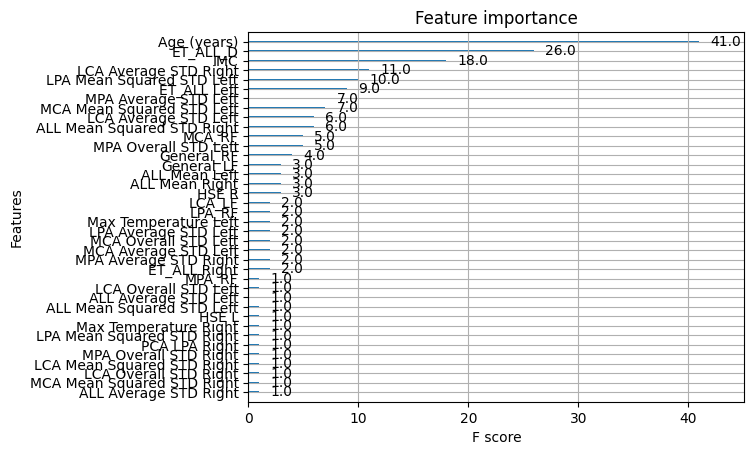

In [ ]:
#Download the model

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import plot_importance
import matplotlib.pyplot as plt

X = All_.iloc[:, :-1]
y = All_.iloc[:,-1]
#oversampling the data using smt
smt = SMOTE(sampling_strategy="all", random_state=42)

#lebeling catogorical columns and balancing the data
# X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train_sm, Y_train_sm = smt.fit_resample(X_train, y_train)

# print(len(Y_train_sm[Y_train_sm == 1]))
# print(len(Y_train_sm[Y_train_sm == 0]))

# Train the XGBoost model
params = {
    'objective': 'binary:logistic',  # Change to your specific problem type
    'eval_metric': 'logloss',        # Change to your evaluation metric
    'max_depth': 6,
    'learning_rate': 0.1,
    'n_estimators': 100,
    'learning_rate':0.1,
    'min_child_weight':1,
    'gamma':0,
    'subsample':0.8,
    'colsample_bytree':0.8,
    'nthread':4,
    'scale_pos_weight':1,
    'seed':42
}

model = xgb.XGBClassifier(**params)
model.fit(X_train_sm, Y_train_sm)
y_pred = model.predict(X_train)

# Plot feature importance
plot_importance(model)
plt.show()

# Get feature importance scores
importance_scores = model.feature_importances_

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance_scores})

# Sort the DataFrame by importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [ ]:
print(X_train)

        HSE R  ET_ALL_D  ET_ALL Right  ALL Mean Right  \
160  0.120000  0.150000     28.620000       22.075671   
92   2.000000  1.650000     26.500000       19.083787   
56   1.068319  3.068319     29.568319       16.626672   
57   1.910000  0.700000     26.590000       20.952655   
24   2.980000  0.170000     31.480000       24.508427   
..        ...       ...           ...             ...   
165  1.423864  0.014043     27.076136       16.479916   
25   3.150000  0.550000     31.650000       23.386213   
156  1.630000  0.430000     26.870000       19.841922   
158  1.110000  0.540000     27.390000       20.544630   
145  1.720000  0.100000     26.780000       18.488172   

     ALL Mean Squared STD Right  ALL Average STD Right  ALL Overall STD Right  \
160                  167.269806              12.933283              12.933283   
92                   115.993697              10.770037              10.770037   
56                    82.480176               9.081860               9.0

selecting a suitable classifier
Please download the model from the ML algorithm

In [ ]:
# XGB boost with the MLP Classifier

from sklearn.feature_selection import SelectFromModel
from xgboost import XGBClassifier
import tensorflow as tf
import joblib
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import csv
import time


start_time = time.time()
# Assuming you have imported the necessary libraries and preprocessed your data
X = All_.iloc[:, :-1]
y = All_.iloc[:,-1]
#oversampling the data using smt
smt = SMOTE(sampling_strategy='auto',random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
X_train_sm, Y_train_sm = smt.fit_resample(X_train, y_train)

# Perform feature selection using XGBoost
xgb_model_fs = XGBClassifier()
# xgb_model_fs.fit(X_train_sm, Y_train_sm)
xgb_model_fs.fit(X_train_sm, Y_train_sm)


# Select features based on feature importance scores
feature_selector = SelectFromModel(xgb_model_fs, threshold=0.05, prefit=True) # Change of the ineterval
# X_train_selected = feature_selector.transform(X_train_sm)
X_train_selected = feature_selector.transform(X_train)
X_test_selected = feature_selector.transform(X_test)



# # # Plot feature importance
# # plot_importance(model)
# # plt.show()

# Get feature importance scores
importance_scores = xgb_model_fs.feature_importances_
print(importance_scores )

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance_scores})

# Sort the DataFrame by importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)
# The meaning of this?
average_type = 'macro'  # Use 'micro', 'macro', or 'weighted' as need

# Train MLP classifier
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
# mlp_model.fit(X_train_selected, Y_train_sm)
mlp_model.fit(X_train_selected, y_train)

# Predict on the test set
y_pred = mlp_model.predict(X_test_selected)

# Evaluate the MLP model
accuracy = mlp_model.score(X_test_selected, y_test)
precision = precision_score(y_test, y_pred, average=average_type)
recall = recall_score(y_test, y_pred, average=average_type)
f1 = f1_score(y_test, y_pred, average=average_type)
conf_matrix = confusion_matrix(y_test, y_pred)

joblib.dump(feature_selector, "/content/drive/MyDrive/model/feature_selector_model")
joblib.dump(mlp_model, "/content/drive/MyDrive/model/structured_data_model")


 # Calculate specificity from confusion matrix
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])


end_time = time.time()
elapsed_time = end_time - start_time

try:
    existing_data = pd.read_csv('/content/drive/MyDrive/accuracy_values.csv')
except FileNotFoundError:
    existing_data = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1','specificity','sensitivity','Inference Time'])  # Create a new DataFrame if file doesn't exist

# Append the new accuracy value to the DataFrame
new_row = pd.DataFrame({'Accuracy': [accuracy],'Precision': [precision],'Recall': [recall],'F1': [f1], 'specificity':[specificity],'sensitivity':[sensitivity],'Inference Time':[elapsed_time]})
updated_data = pd.concat([existing_data, new_row], ignore_index=True)

print("Accuracy:", accuracy)
updated_data.to_csv('/content/drive/MyDrive/accuracy_values.csv', index=False)

print("Precision:", precision)
print("Recall (Sensitivity):", recall)
print("F1-Score:", f1)
print("Specificity:", specificity)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate precision, recall, and F1-score
report = classification_report(y_test, y_pred, target_names=['0','1'])
print("Classification Report:")
print(report)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


[0.00182161 0.1511997  0.00433772 0.03241418 0.         0.
 0.         0.00371447 0.         0.         0.         0.
 0.         0.01999903 0.         0.         0.         0.
 0.         0.         0.04834306 0.00744108 0.         0.
 0.         0.         0.         0.         0.         0.
 0.00219846 0.         0.         0.00996185 0.         0.
 0.         0.04124177 0.         0.         0.         0.37917367
 0.00488419 0.11161503 0.         0.01001678 0.         0.01050901
 0.08689291 0.         0.07423551 0.         0.        ]
                       Feature  Importance
41                 Age (years)    0.379174
1                     ET_ALL_D    0.151200
43                  General_RF    0.111615
48                  General_LF    0.086893
50                      LPA_LF    0.074236
20       Max Temperature Right    0.048343
37   LPA Mean Squared STD Left    0.041242
3               ALL Mean Right    0.032414
13       MPA Average STD Right    0.019999
47                      M

In [ ]:
print(X_train)

     HSE R  ET_ALL_D  ET_ALL Right  ALL Mean Right  \
86    1.82      6.71         26.68       19.498810   
119   2.41      4.21         30.91       21.995274   
123   1.50      0.02         27.00       20.978079   
54    2.81      0.15         31.31       23.525621   
18    0.81      3.77         29.31       21.177299   
..     ...       ...           ...             ...   
26    2.00      4.98         26.50       18.313265   
164   2.00      0.00         26.50       18.359122   
80    2.88      3.16         31.38       22.308508   
87    1.88      0.12         26.62       19.085075   
130   1.33      0.04         27.17       18.498077   

     ALL Mean Squared STD Right  ALL Average STD Right  ALL Overall STD Right  \
86                   146.816364              12.116780              12.116780   
119                  201.857042              14.207640              14.207640   
123                  148.855933              12.200653              12.200653   
54                   201.74

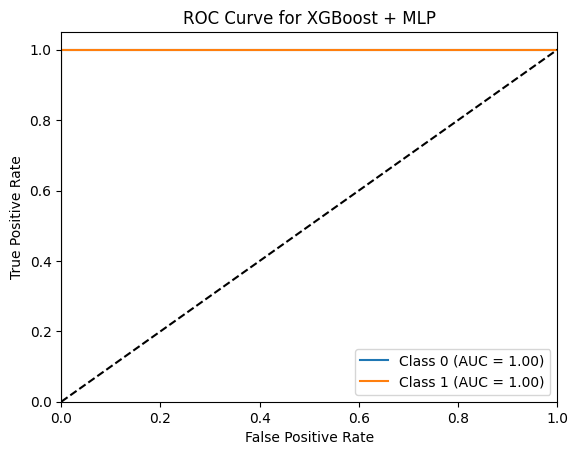

Classifier: XGBoost + MLP
Accuracy: 0.9117647058823529
Precision: 0.9110671936758893
Sensitivity (Recall): 0.9545454545454546
F1-Score: 0.9014492753623188
Specificity: 0.8333333333333334
AUC: {0: 1.0, 1: 1.0}
---------------------------------------------------


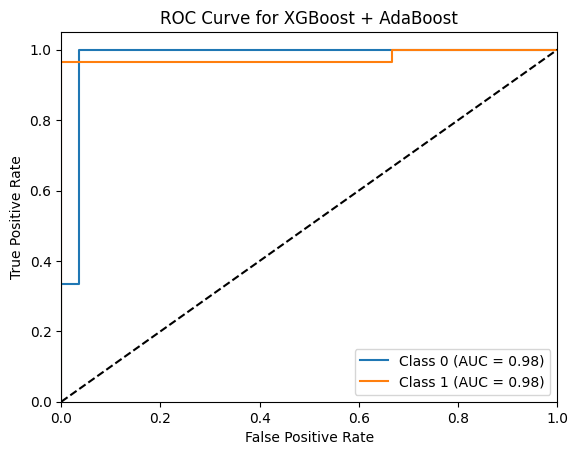

Classifier: XGBoost + AdaBoost
Accuracy: 0.9117647058823529
Precision: 0.9110671936758893
Sensitivity (Recall): 0.9545454545454546
F1-Score: 0.9014492753623188
Specificity: 0.8333333333333334
AUC: {0: 0.9761904761904762, 1: 0.9761904761904762}
---------------------------------------------------


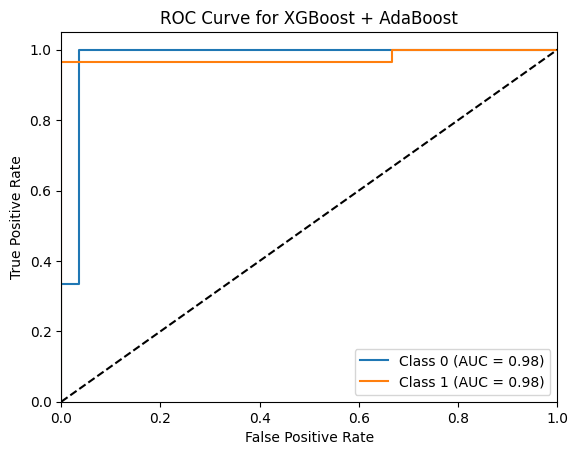

Classifier: XGBoost + AdaBoost
Accuracy: 0.9117647058823529
Precision: 0.9110671936758893
Sensitivity (Recall): 0.9545454545454546
F1-Score: 0.9014492753623188
Specificity: 0.8333333333333334
AUC: {0: 0.9761904761904762, 1: 0.9761904761904762}
---------------------------------------------------


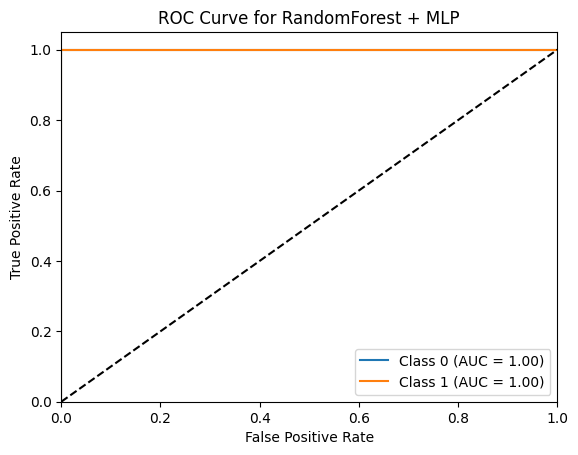

Classifier: RandomForest + MLP
Accuracy: 0.9117647058823529
Precision: 0.9110671936758893
Sensitivity (Recall): 0.9545454545454546
F1-Score: 0.9014492753623188
Specificity: 0.8333333333333334
AUC: {0: 1.0, 1: 1.0}
---------------------------------------------------


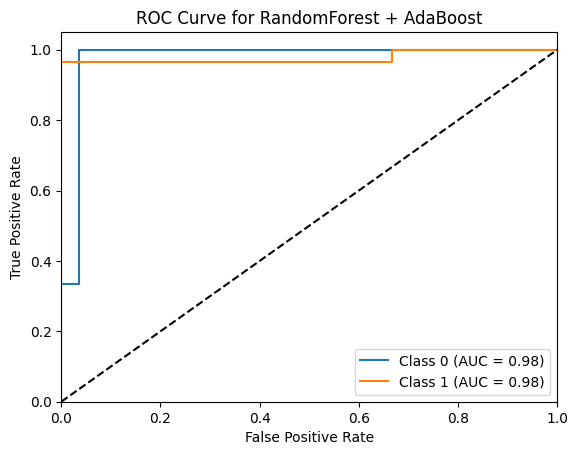

Classifier: RandomForest + AdaBoost
Accuracy: 0.9117647058823529
Precision: 0.9110671936758893
Sensitivity (Recall): 0.9545454545454546
F1-Score: 0.9014492753623188
Specificity: 0.8333333333333334
AUC: {0: 0.9761904761904762, 1: 0.9761904761904762}
---------------------------------------------------


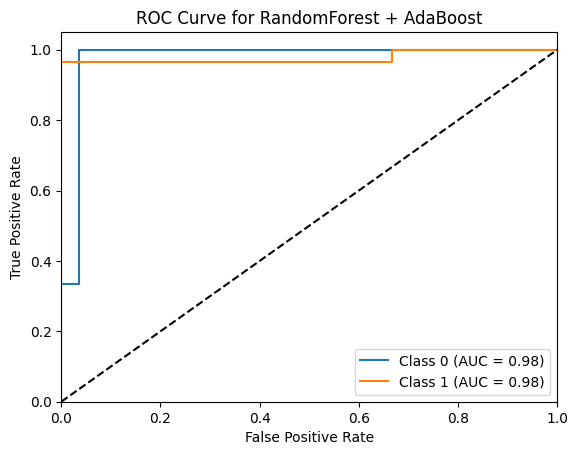

Classifier: RandomForest + AdaBoost
Accuracy: 0.9117647058823529
Precision: 0.9110671936758893
Sensitivity (Recall): 0.9545454545454546
F1-Score: 0.9014492753623188
Specificity: 0.8333333333333334
AUC: {0: 0.9761904761904762, 1: 0.9761904761904762}
---------------------------------------------------


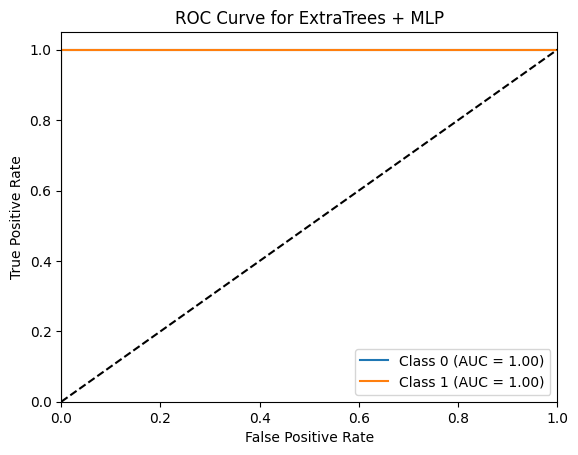

Classifier: ExtraTrees + MLP
Accuracy: 0.9117647058823529
Precision: 0.9110671936758893
Sensitivity (Recall): 0.9545454545454546
F1-Score: 0.9014492753623188
Specificity: 0.8333333333333334
AUC: {0: 1.0, 1: 1.0}
---------------------------------------------------


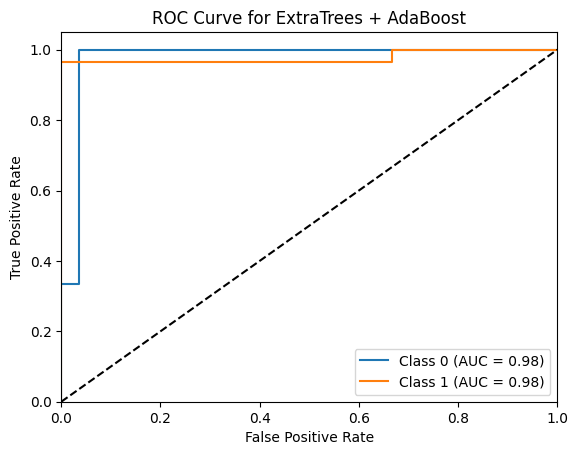

Classifier: ExtraTrees + AdaBoost
Accuracy: 0.9117647058823529
Precision: 0.9110671936758893
Sensitivity (Recall): 0.9545454545454546
F1-Score: 0.9014492753623188
Specificity: 0.8333333333333334
AUC: {0: 0.9761904761904762, 1: 0.9761904761904762}
---------------------------------------------------


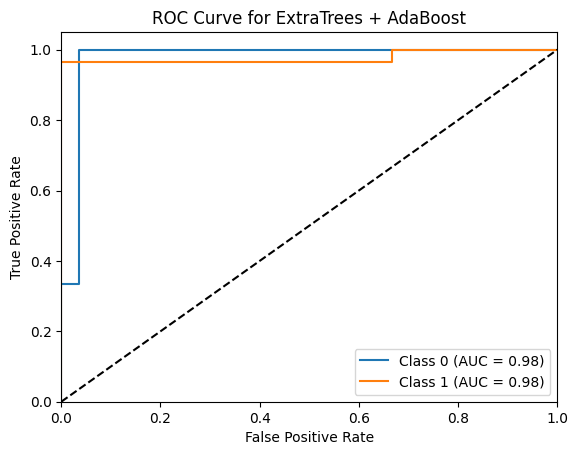

Classifier: ExtraTrees + AdaBoost
Accuracy: 0.9117647058823529
Precision: 0.9110671936758893
Sensitivity (Recall): 0.9545454545454546
F1-Score: 0.9014492753623188
Specificity: 0.8333333333333334
AUC: {0: 0.9761904761904762, 1: 0.9761904761904762}
---------------------------------------------------


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import label_binarize
from itertools import cycle
import time

# Load the dataset (you can replace this with your dataset)
# Load the dataset (you can replace this with your dataset)
start_time = time.time()
X = All_.iloc[:, :-1]
y = All_.iloc[:,-1]
#oversampling the data using smt
smt = SMOTE(random_state=42)

#splitting the data and resampling them
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2)
X_train_sm, Y_train_sm = smt.fit_resample(X_train, y_train)


# Binarize the labels
# y_bin = label_binarize(y, classes=[0, 1])
# n_classes = np.array(y).shape[1]
y=np.array(y)
y_shape = y
n_classes  = y_shape[1]

# Define feature selection classifiers
feature_selectors = [
    ("XGBoost", XGBClassifier(n_estimators=100, random_state=42)),
    ("RandomForest", RandomForestClassifier(n_estimators=100, random_state=42)),
    ("ExtraTrees", ExtraTreesClassifier(n_estimators=100, random_state=42))
]


# Define classification algorithms
classifiers = [
    ("MLP", MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)),
    ("AdaBoost", AdaBoostClassifier(n_estimators=50, random_state=42)),
     ("AdaBoost", AdaBoostClassifier(n_estimators=50, random_state=42))
]



# Create ROC curve plots for each combination of feature selector and classifier
for selector_name, fs_classifier in feature_selectors:
  for classifier_name, classifier in classifiers:
    # Fit feature selector on the training data
    fs_classifier.fit(X_train_sm, Y_train_sm)

    # Get selected features using the classifier's feature importances
    feature_mask = feature_importance_df[feature_importance_df['Importance'] >= 0.06]
    selected_features_ = feature_mask['Feature']
    selected_features =  X_train.loc[:,selected_features_ ]
    selected_features_test =  X_test.loc[:,selected_features_ ]

    # selected_features = X_train_sm[:, fs_classifier.feature_importances_.argsort()[::-1][:num_features]]
    # selected_features_test = X_test[:, fs_classifier.feature_importances_.argsort()[::-1][:num_features]]

    classifier.fit(selected_features, y_train)


    # Calculate ROC curve and AUC
    n_classes = len(np.unique(Y_train_sm))
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        # Retrieve target values for the class
        y_true_class = (y_test == i)

        # Calculate ROC curve and AUC for the class
        fpr[i], tpr[i], _ = roc_curve(y_true_class,  classifier.predict_proba(selected_features_test)[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

#     # Rest of your code to plot ROC curves and compute metrics


    plt.figure()
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {selector_name} + {classifier_name}')
    plt.legend(loc="lower right")
    plt.show()

    # ... Calculate other metrics (accuracy, precision, recall, etc.) ...

    # Print the computed metrics
    print(f"Classifier: {selector_name} + {classifier_name}")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Sensitivity (Recall):", sensitivity)
    print("F1-Score:", f1)
    print("Specificity:", specificity)
    print("AUC:", roc_auc)
    print("---------------------------------------------------")



The CNN to classify the Control Group with Dibaetic patients

Importing the relevant libraies

In [ ]:
# Importing all important libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow import keras
import cv2
from PIL import Image
import PIL
import imgaug.augmenters as iaa
import datetime

import random
import pathlib
import tensorflow as tf


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import MinMaxScaler



Reading the relevant files

In [ ]:
#file directory
CG_directory_L = '/content/drive/MyDrive/Images/All_Foot/CG/L'
CG_directory_R = '/content/drive/MyDrive/Images/All_Foot/CG/R'

DM_directory_L = '/content/drive/MyDrive/Images/All_Foot/DM/L'
DM_directory_R = '/content/drive/MyDrive/Images/All_Foot/DM/R'

#extracting the names
CG_directory_L_ = os.listdir(CG_directory_L)
CG_directory_R_ = os.listdir(CG_directory_R)

DM_directory_L_ = os.listdir(DM_directory_L)
DM_directory_R_ = os.listdir(DM_directory_R )

#filtering images
CG_png_files_L          = [filename for filename in CG_directory_L_ if '_L' in filename and filename.endswith('.png')]
CG_png_files_R          = [filename for filename in CG_directory_R_ if '_R' in filename and filename.endswith('.png')]

DM_png_files_L          = [filename for filename in DM_directory_L_ if '_L' in filename and filename.endswith('.png')]
DM_png_files_R          = [filename for filename in DM_directory_R_ if '_R' in filename and filename.endswith('.png')]

DM_png_files_L_         = DM_png_files_L[0:100]
DM_png_files_R_         = DM_png_files_R[0:100]

print(CG_png_files_L)
print(CG_png_files_R)


['CG001_M_L.png', 'CG002_M_L.png', 'CG003_M_L.png', 'CG004_F_L.png', 'CG005_F_L.png', 'CG006_F_L.png', 'CG007_F_L.png', 'CG008_F_L.png', 'CG009_M_L.png', 'CG010_M_L.png', 'CG011_F_L.png', 'CG012_F_L.png', 'CG013_M_L.png', 'CG014_M_L.png', 'CG015_M_L.png', 'CG016_M_L.png', 'CG017_F_L.png', 'CG018_M_L.png', 'CG019_F_L.png', 'CG020_F_L.png', 'CG021_M_L.png', 'CG022_M_L.png', 'CG023_F_L.png', 'CG024_F_L.png', 'CG025_M_L.png', 'CG026_M_L.png', 'CG027_M_L.png', 'CG028_M_L.png', 'CG029_F_L.png', 'CG030_M_L.png', 'CG031_M_L.png', 'CG032_M_L.png', 'CG033_M_L.png', 'CG034_M_L.png', 'CG035_M_L.png', 'CG036_M_L.png', 'CG037_M_L.png', 'CG038_M_L.png', 'CG039_M_L.png', 'CG040_M_L.png', 'CG041_F_L.png', 'CG042_F_L.png', 'CG043_M_L.png', 'CG044_F_L.png', 'CG045_M_L.png']
['CG001_M_R.png', 'CG002_M_R.png', 'CG003_M_R.png', 'CG004_F_R.png', 'CG005_F_R.png', 'CG006_F_R.png', 'CG007_F_R.png', 'CG008_F_R.png', 'CG009_M_R.png', 'CG010_M_R.png', 'CG011_F_R.png', 'CG012_F_R.png', 'CG013_M_R.png', 'CG014_M_R.p

Data Augmentation in CG group

Please Don't RUN THIS CODE EVERYTIME!!!



In [ ]:
#CG Array
#Generating 1800 images from CG array
import time
CG_ARRAY = []
CG_ALL_AUGMENTED_IMAGES = []
CG_AUGMENTED = []
image_count = 0

# Addition of the Left and Right images together
CG_png_files_ = CG_png_files_L  + CG_png_files_R
DM_png_files_  = DM_png_files_L_ + DM_png_files_R_

# Load an example image (replace this with your own image loading code)


for file in CG_png_files_:
  if '_L' in file:
        png_file_path = os.path.join(CG_directory_L , file)
        image = Image.open(png_file_path)
        image_array = np.array(image)
        CG_ARRAY.append(image_array)

  elif '_R' in file:
        png_file_path = os.path.join(CG_directory_R , file)
        image = Image.open(png_file_path)
        image_array = np.array(image)
        CG_ARRAY.append(image_array)
  else :
        print("Path is invalid")


def flip(image)->np.ndarray:
  seq = iaa.Sequential([iaa.Fliplr(0.5)])                                      # Horizontal flip with a 50% chance
  augmented_image = seq(image=image)
  return  augmented_image

def Affine(image)->np.ndarray:
  seq = iaa.Sequential([iaa.Affine(rotate=(-20, 20))])                         # Rotate image by -20 to 20 degrees
  augmented_image = seq(image=image)
  return  augmented_image

def Gaussian_Blur(image)->np.ndarray:
  seq = iaa.Sequential([iaa.GaussianBlur(sigma=(0, 3.0))])                     # Apply Gaussian Blur
  augmented_image = seq(image=image)
  return  augmented_image

def Gaussian_Noise(image)->np.ndarray:
  seq = iaa.Sequential([iaa.AdditiveGaussianNoise(scale=(0, 0.05*255))])       # Apply Gaussian Blur
  augmented_image = seq(image=image)
  return  augmented_image

def Brightness(image)->np.ndarray:
  seq = iaa.Sequential([iaa.Multiply((0.5, 1.5))])                             # Apply Gaussian Blur
  augmented_image = seq(image=image)
  return  augmented_image

def Contrast_Normalization(image)->np.ndarray:
  seq = iaa.Sequential([iaa.ContrastNormalization((0.5, 1.5))])                # Apply Gaussian Blur
  augmented_image = seq(image=image)
  return  augmented_image

def Affine_Scale(image)->np.ndarray:
  seq = iaa.Sequential([iaa.Affine(scale=(0.5, 1.5))])                         # Apply affine
  augmented_image = seq(image=image)
  return  augmented_image

def Affine_Shear(image)->np.ndarray:
  seq = iaa.Sequential([iaa.PerspectiveTransform(scale=(0.01, 0.1))])                         # Apply affine
  augmented_image = seq(image=image)
  return  augmented_image

def Perspective_Transform(image)->np.ndarray:
  seq = iaa.Sequential([iaa.Affine(shear=(0.5, 1.5))])                         # Apply affine
  augmented_image = seq(image=image)
  return  augmented_image

def  Most_Noise(image)->np.ndarray:
  seq = augmentation_pipeline_all = iaa.Sequential([
  iaa.Fliplr(0.5),        # Horizontal flip with a 50% chance
  iaa.Affine(rotate=(-20, 20)),  # Rotate image by -20 to 20 degrees
  iaa.GaussianBlur(sigma=(0, 3.0)),  # Apply Gaussian blur
  iaa.AdditiveGaussianNoise(scale=(0, 0.05*255))  # Add Gaussian noise
                                                ])                              # Apply affine
  augmented_image = seq(image=image)
  return  augmented_image

def  Random_Noise(image,number)->np.ndarray:
  random_noise = [iaa.Fliplr(0.5),iaa.Affine(rotate=(-20, 20)),iaa.GaussianBlur(sigma=(0, 3.0)),iaa.AdditiveGaussianNoise(scale=(0, 0.05*255))]
  seq = augmentation_pipeline_all = iaa.Sequential([
  iaa.Fliplr(0.5),        # Horizontal flip with a 50% chance
  iaa.Affine(rotate=(-20, 20)),  # Rotate image by -20 to 20 degrees
  iaa.GaussianBlur(sigma=(0, 3.0)),  # Apply Gaussian blur
  iaa.AdditiveGaussianNoise(scale=(0, 0.05*255))  # Add Gaussian noise
                                                ])                              # Apply affine
  augmented_image = seq(image=image)
  return  augmented_image



operations = {
    "flip": flip ,
    "affine Scale": Affine_Scale,
    "gaussian blur": Gaussian_Blur,
    "brightness":Brightness,
    "gaussian additive noise":Gaussian_Noise,
    "contrast normalization":Contrast_Normalization,
    "affine scale":  Affine_Scale,
    "affine shear": Affine_Shear,
    "persceptive transform":Perspective_Transform,
    "most noise":Most_Noise
}

output_directory =  '/content/drive/MyDrive/All_Images/CG'


def saving_the_image(augmented_image,output_directory):
  global image_count
  image_count = image_count+1
  file_name = f'image_{image_count}.jpg'
  output_file_path = os.path.join(output_directory, file_name)
  # with open(output_file_path, 'wb') as image_augmented:
  # im1 = Image.open(r"C:\Users\System-Pc\Desktop\flower1.jpg")
  i = Image.fromarray(augmented_image)
  i.save(output_file_path)
  time.sleep(0.1)


def Augmnentation_pipeline(operation,cg_array, store_array)->np.ndarray:
    if operation in operations :
      operation_function = operations[operation]
      for cg_image in cg_array:
        operation_function = operations[random.choice(list(operations.keys()))]
        augmented_image = operation_function(image=cg_image)
        store_array.append(augmented_image)
        saving_the_image(augmented_image,output_directory)
        # saving_the_image(output_directory,augmented_image)
    elif operation == "multi":
      for cg_image in cg_array:
        operation_function = operations[random.choice(list(operations.keys()))]
        augmented_image = operation_function(image=cg_image)
        augmented_image_ = operations[random.choice(list(operations.keys()))](image=augmented_image)
        store_array.append(augmented_image_)
        saving_the_image(augmented_image_,output_directory)
        # saving_the_image(output_directory,augmented_image)
      return store_array

def pass_pipeline(cg_array, store_array)->np.ndarray:
  for cg_image in cg_array:
    store_array.append(cg_image)
    saving_the_image(cg_image,output_directory)
  return store_array



Augmnentation_pipeline("flip",CG_ARRAY,CG_ALL_AUGMENTED_IMAGES)
Augmnentation_pipeline("affine Scale",CG_ARRAY,CG_ALL_AUGMENTED_IMAGES)
Augmnentation_pipeline("gaussian blur",CG_ARRAY,CG_ALL_AUGMENTED_IMAGES)
Augmnentation_pipeline("brightness",CG_ARRAY,CG_ALL_AUGMENTED_IMAGES)
Augmnentation_pipeline("gaussian additive noise",CG_ARRAY,CG_ALL_AUGMENTED_IMAGES)
Augmnentation_pipeline("contrast normalization",CG_ARRAY,CG_ALL_AUGMENTED_IMAGES)
Augmnentation_pipeline("affine Scale",CG_ARRAY,CG_ALL_AUGMENTED_IMAGES)
Augmnentation_pipeline("affine shear",CG_ARRAY,CG_ALL_AUGMENTED_IMAGES)
Augmnentation_pipeline("most noise",CG_ARRAY,CG_ALL_AUGMENTED_IMAGES)
Augmnentation_pipeline("persceptive transform",CG_ARRAY,CG_ALL_AUGMENTED_IMAGES)
Augmnentation_pipeline("multi",CG_ARRAY,CG_ALL_AUGMENTED_IMAGES)
Augmnentation_pipeline("multi",CG_ARRAY,CG_ALL_AUGMENTED_IMAGES)
Augmnentation_pipeline("multi",CG_ARRAY,CG_ALL_AUGMENTED_IMAGES)
Augmnentation_pipeline("multi",CG_ARRAY,CG_ALL_AUGMENTED_IMAGES)
Augmnentation_pipeline("multi",CG_ARRAY,CG_ALL_AUGMENTED_IMAGES)
Augmnentation_pipeline("multi",CG_ARRAY,CG_ALL_AUGMENTED_IMAGES)
Augmnentation_pipeline("multi",CG_ARRAY,CG_ALL_AUGMENTED_IMAGES)
Augmnentation_pipeline("multi",CG_ARRAY,CG_ALL_AUGMENTED_IMAGES)
Augmnentation_pipeline("multi",CG_ARRAY,CG_ALL_AUGMENTED_IMAGES)
# Augmnentation_pipeline("multi",CG_ARRAY,CG_ALL_AUGMENTED_IMAGES)
pass_pipeline(CG_ARRAY, CG_ALL_AUGMENTED_IMAGES)
print(len(CG_ALL_AUGMENTED_IMAGES))












/usr/local/lib/python3.10/dist-packages/imgaug/imgaug.py:184: DeprecationWarning: Function `ContrastNormalization()` is deprecated. Use `imgaug.contrast.LinearContrast` instead.
  warn_deprecated(msg, stacklevel=3)


Data Augmentation of DM group

In [ ]:
DM_png_files_  = DM_png_files_L_ + DM_png_files_R_
print(len(DM_png_files_))
output_directory =  '/content/drive/MyDrive/All_Images/DM'

#DM Array
#Generating 1800 images from DM array
DM_ARRAY = []
DM_ALL_AUGMENTED_IMAGES = []
DM_AUGMENTED = []
OUTPUT_IMAGE_DIRECTORY = '/content/drive/MyDrive/All_Images/DM'

for file in DM_png_files_:
  if '_L' in file:
        png_file_path = os.path.join(DM_directory_L , file)
        image = Image.open(png_file_path)
        image_array = np.array(image)
        DM_ARRAY.append(image_array)
  elif '_R' in file:
        png_file_path = os.path.join(DM_directory_R , file)
        image = Image.open(png_file_path)
        image_array = np.array(image)
        DM_ARRAY.append(image_array)
  else :
        print("Path is invalid")



Augmnentation_pipeline("multi",DM_ARRAY,DM_ALL_AUGMENTED_IMAGES)
Augmnentation_pipeline("multi",DM_ARRAY,DM_ALL_AUGMENTED_IMAGES)
Augmnentation_pipeline("multi",DM_ARRAY,DM_ALL_AUGMENTED_IMAGES)
Augmnentation_pipeline("multi",DM_ARRAY,DM_ALL_AUGMENTED_IMAGES)
Augmnentation_pipeline("multi",DM_ARRAY,DM_ALL_AUGMENTED_IMAGES)
Augmnentation_pipeline("multi",DM_ARRAY,DM_ALL_AUGMENTED_IMAGES)
Augmnentation_pipeline("multi",DM_ARRAY,DM_ALL_AUGMENTED_IMAGES)
Augmnentation_pipeline("multi",DM_ARRAY,DM_ALL_AUGMENTED_IMAGES)
pass_pipeline(DM_ARRAY,DM_ALL_AUGMENTED_IMAGES)
print(len(DM_ALL_AUGMENTED_IMAGES))

200


testing the CNN

In [ ]:
pip install tensorflow

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np


# Define image dimensions

image_path = '/content/drive/MyDrive/All_Images/CG/image_1.jpg'
image = cv2.imread(image_path)
img_height, img_width = image.shape[:2]

print(f"Image width: {img_width} pixels")
print(f"Image height: {img_height} pixels")

img_height, img_width = image.shape[:2]

directory = '/content/drive/MyDrive/All_Images'
classes = [file for file in os.listdir(directory) if not file.endswith('.ipynb_checkpoints')]

# Load and preprocess the data
# ds = tf.keras.preprocessing.image_dataset_from_directory(
#     directory,
#     shuffle=True,
#     image_size=(img_height, img_width),
#     batch_size=32,
# )

#resize and rescale the value
# resize_and_rescale = tf.keras.Sequential([
#     tf.keras.layers.experimental.preprocessing.Resizing(img_height,img_width),
#     tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255)
# ])

# ds  = tf.keras.utils.image_dataset_from_directory(
#     directory,
#     labels='inferred',
#     label_mode='categorical',
#     class_names=['CG','DM'],
#     color_mode='rgb',
#     batch_size=32,
#     image_size=(img_height, img_width),
#     shuffle=True,
#     seed=None,
#     validation_split=None,
#     subset=None,
#     interpolation='bilinear',
#     follow_links=False,
#     crop_to_aspect_ratio=False,
# )

#resize and rescale the value

#Load and preprocess the data
ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    shuffle=True,
    image_size=(img_height, img_width),
    batch_size=32,
)
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(img_height,img_width),
    tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255)
])

print(len(ds))
print(ds.class_names)

# Splitting the training set
train_size = int(0.8 * len(ds))
train_ds = ds.take(train_size)
test_ds = ds.skip(train_size)



# Create the base MobileNetV2 model
input_shape = (img_height, img_width , 3)
base_model = MobileNetV2(input_shape=input_shape, include_top=False, weights='imagenet')
# base_model = InceptionV3(input_shape=input_shape, include_top=False, weights='imagenet')
base_model.trainable = False

# Create the binary classification model
inputs = tf.keras.Input(shape=input_shape)
x = preprocess_input(inputs)
x = base_model(x, training=False)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.1)(x)
outputs = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(inputs, outputs)

# Compile the model
loss_function = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
metrics = ['accuracy',tf.metrics.Recall(), tf.metrics.Precision(),tf.metrics.AUC()]
# metrics = ['accuracy']
model.compile(optimizer=optimizer, loss=loss_function, metrics=metrics)

# Train the model
total_epochs = 15
history = model.fit(train_ds, epochs=total_epochs, validation_data=test_ds)

# Evaluate the model
# model.evaluate(test_ds)
model.build(input_shape)
model.summary()


acc =  history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(total_epochs)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')


In [ ]:
import tensorflow as tf


directory = '/content/drive/MyDrive/All_Images'
classes = [file for file in os.listdir(directory) if not file.endswith('.ipynb_checkpoints')]

image_path = '/content/drive/MyDrive/All_Images/CG/image_1.jpg'
image = cv2.imread(image_path)
img_height, img_width = image.shape[:2]

In [ ]:
import tensorflow as tf
print(tf.__version__)


2.15.0


In [ ]:
ds  = tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='categorical',
    class_names=['CG','DM'],
    color_mode='rgb',
    batch_size=32,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)
feature_labels = []
image_data           = []

# Initialize lists to store images and labels
image_matrices = []
labels = []

# Iterate through the dataset to get batches of data and labels
for data, label_batch in ds:
    # Append the image matrices and labels to the lists
    image_matrices.extend(data)
    labels.extend(label_batch)


print(len(image_matrices))
print(len(labels))
# Convert one-hot encoded labels to class indices
# class_indices = tf.argmax(labels, axis=1)

# Now, 'image_matrices' contains the image data as NumPy arrays,
# and 'class_indices' contains the corresponding class indices.

# # If you want to access the actual class names
# class_data = [image_data for image_data in image_matrices]

# # If you want to access the actual class labels (CG, DM)
# class_labels = [label_batch for label_batch in class_indices]

# print(class_labels)
# print(class_data)

Found 3600 files belonging to 2 classes.
3600
3600


In [ ]:

#save the follwing model

import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np


# Define image dimensions

image_path = '/content/drive/MyDrive/All_Images/CG/image_1.jpg'
image = cv2.imread(image_path)
img_height, img_width = image.shape[:2]

print(image.shape)

print(f"Image width: {img_width} pixels")
print(f"Image height: {img_height} pixels")

img_height, img_width = image.shape[:2]

directory = '/content/drive/MyDrive/All_Images'
classes = [file for file in os.listdir(directory) if not file.endswith('.ipynb_checkpoints')]

# Load and preprocess the data
# ds = tf.keras.preprocessing.image_dataset_from_directory(
#     directory,
#     shuffle=True,
#     image_size=(img_height, img_width),
#     batch_size=32,
# )

#resize and rescale the value
# resize_and_rescale = tf.keras.Sequential([
#     tf.keras.layers.experimental.preprocessing.Resizing(img_height,img_width),
#     tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255)
# ])

ds  = tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='categorical',
    class_names=['CG','DM'],
    color_mode='rgb',
    batch_size=32,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)


# Splitting the training set
train_size = int(0.8 * len(ds))
train_ds = ds.take(train_size)
test_ds = ds.skip(train_size)

# Create the base MobileNetV2 model
input_shape = (img_height, img_width , 3)
base_model = MobileNetV2(input_shape=input_shape, include_top=False, weights='imagenet')
# base_model = InceptionV3(input_shape=input_shape, include_top=False, weights='imagenet')
base_model.trainable = False

# Create the binary classification model
inputs = tf.keras.Input(shape=input_shape)
x = preprocess_input(inputs)
x = base_model(x, training=False)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.1)(x)
outputs = Dense(2, activation='sigmoid')(x)
model = tf.keras.Model(inputs, outputs)

# Compile the model
loss_function = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
metrics = ['accuracy',tf.metrics.Recall(), tf.metrics.Precision(),tf.metrics.AUC()]
# model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
loss_function = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
# metrics = ['accuracy']
metrics = ['accuracy',tf.metrics.Recall(), tf.metrics.Precision(),tf.metrics.AUC()]
model.compile(optimizer=optimizer, loss=loss_function, metrics=metrics)
model.build(input_shape)
model.summary()
# early stopping call back
early = tf.keras.callbacks.EarlyStopping( patience=10,
                                          min_delta=0.01,
                                          restore_best_weights=True)
# early stopping call back

ep = 50

# fit model
history = model.fit(train_ds,
                    validation_data=test_ds,
                    epochs=ep,
                    callbacks=[early])

end_epoch = len(history.history['loss'])
acc =  history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(end_epoch)


# Assuming you have a Keras model named 'model'

# Save the architecture to a JSON file
model_json = model.to_json()
with open("/content/drive/MyDrive/model/model_arch.json", "w") as json_file:
    json_file.write(model_json)

# Save the weights to an HDF5 file
model.save_weights("/content/drive/MyDrive/model/unstructured_data_model_weights.h5")


acc =  history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(total_epochs)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')


In [ ]:
import cv2
image_path = '/content/drive/MyDrive/All_Images/CG/image_1.jpg'
image = cv2.imread(image_path)
img_height, img_width = image.shape[:2]

print(image.shape)

(168, 65, 3)


In [ ]:
import tensorflow
import os


directory = '/content/drive/MyDrive/All_Images'
classes = [file for file in os.listdir(directory) if not file.endswith('.ipynb_checkpoints')]

ds = tensorflow.keras.utils.image_dataset_from_directory(
    directory,  # Use the main directory
    labels='inferred',
    label_mode='binary',  # Change to categorical if using multiple classes
    class_names=['CG', 'DM'],
    color_mode='rgb',
    batch_size=32,
    image_size=(168, 65),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)
        # Splitting the training set
        #feature declearation
        # Initialize lists to store images and labels
image_matrices = []
labels = []

for data, label_batch in ds:
            # Append the image matrices and labels to the lists
    image_matrices.extend(data)
    print(data.shape)
    labels.extend(label_batch)

print(len(image_matrices))
print(len(labels))
# print(image_matrices[0])


Found 3600 files belonging to 2 classes.
(32, 168, 65, 3)
(32, 168, 65, 3)
(32, 168, 65, 3)
(32, 168, 65, 3)
(32, 168, 65, 3)
(32, 168, 65, 3)
(32, 168, 65, 3)
(32, 168, 65, 3)
(32, 168, 65, 3)
(32, 168, 65, 3)
(32, 168, 65, 3)
(32, 168, 65, 3)
(32, 168, 65, 3)
(32, 168, 65, 3)
(32, 168, 65, 3)
(32, 168, 65, 3)
(32, 168, 65, 3)
(32, 168, 65, 3)
(32, 168, 65, 3)
(32, 168, 65, 3)
(32, 168, 65, 3)
(32, 168, 65, 3)
(32, 168, 65, 3)
(32, 168, 65, 3)
(32, 168, 65, 3)
(32, 168, 65, 3)
(32, 168, 65, 3)
(32, 168, 65, 3)
(32, 168, 65, 3)
(32, 168, 65, 3)
(32, 168, 65, 3)
(32, 168, 65, 3)
(32, 168, 65, 3)
(32, 168, 65, 3)
(32, 168, 65, 3)
(32, 168, 65, 3)
(32, 168, 65, 3)
(32, 168, 65, 3)
(32, 168, 65, 3)
(32, 168, 65, 3)
(32, 168, 65, 3)
(32, 168, 65, 3)
(32, 168, 65, 3)
(32, 168, 65, 3)
(32, 168, 65, 3)
(32, 168, 65, 3)
(32, 168, 65, 3)
(32, 168, 65, 3)
(32, 168, 65, 3)
(32, 168, 65, 3)
(32, 168, 65, 3)
(32, 168, 65, 3)
(32, 168, 65, 3)
(32, 168, 65, 3)
(32, 168, 65, 3)
(32, 168, 65, 3)
(32, 16

In [ ]:
print(image_matrices[0])

tf.Tensor(
[[[ 6.          0.          0.        ]
  [ 6.          4.9000006   0.        ]
  [ 3.          6.5         3.5       ]
  ...
  [ 2.5         2.5         2.5       ]
  [ 1.4000015   1.4000015   1.4000015 ]
  [ 0.          0.          0.        ]]

 [[ 8.035714    0.          0.        ]
  [ 7.0857143   3.0000002   0.        ]
  [ 3.3392859   5.142857    5.196429  ]
  ...
  [ 1.8214285   1.8214285   1.8214285 ]
  [ 0.925001    0.925001    0.925001  ]
  [ 0.          0.          0.        ]]

 [[11.321428    0.          0.        ]
  [ 8.296428    1.1250002   0.6499999 ]
  [ 3.5         2.4107146   7.8571424 ]
  ...
  [ 1.0357144   1.0357144   1.0357144 ]
  [ 0.37500048  0.37500048  0.37500048]
  [ 0.          0.          0.        ]]

 ...

 [[10.678528    1.0714111   0.        ]
  [ 5.678552    0.3214233   0.        ]
  [ 1.7678528   0.5         2.9642944 ]
  ...
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.   

Model to catogorize the severity of the diabetes

In [ ]:
import os
DM = []

Class_1 = '/content/drive/MyDrive/DM_Severity_Classification/Class_1'
Class_2 = '/content/drive/MyDrive/DM_Severity_Classification/Class_2'
Class_3 = '/content/drive/MyDrive/DM_Severity_Classification/Class_3'
Class_4 = '/content/drive/MyDrive/DM_Severity_Classification/Class_4'
Class_5 = '/content/drive/MyDrive/DM_Severity_Classification/Class_5'
Class_6 = '/content/drive/MyDrive/DM_Severity_Classification/Class_6'

# Extracting the names
Class_1_ = os.listdir(Class_1)
Class_2_ = os.listdir(Class_2)
Class_3_ = os.listdir(Class_3)
Class_4_ = os.listdir(Class_4)
Class_5_ = os.listdir(Class_5)
Class_6_ = os.listdir(Class_6)

# Filtering images
DM_1 = [imgfile for imgfile in Class_1_ if imgfile.endswith('.png')]
DM_2 = [imgfile for imgfile in Class_2_ if imgfile.endswith('.png')]
DM_3 = [imgfile for imgfile in Class_3_ if imgfile.endswith('.png')]
DM_4 = [imgfile for imgfile in Class_4_ if imgfile.endswith('.png')]
DM_5 = [imgfile for imgfile in Class_5_ if imgfile.endswith('.png')]
DM_6 = [imgfile for imgfile in Class_6_ if imgfile.endswith('.png')]

print(len(DM_1))
print(len(DM_2))
print(len(DM_3))
print(len(DM_4))
print(len(DM_5))
print(len(DM_6))

30
30
35
32
36
90


In [ ]:
#Code for ResNet18
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, AveragePooling2D, Flatten, Dense, Add
from tensorflow.keras.models import Model


def basic_block(x, filters, stride=1):
    # First convolutional layer
    y = Conv2D(filters, kernel_size=(3, 3), strides=stride, padding='same')(x)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)
    # Second convolutional layer
    y = Conv2D(filters, kernel_size=(3, 3), strides=1, padding='same')(y)
    y = BatchNormalization()(y)
    # Skip connection
    if stride != 1:
        x = Conv2D(filters, kernel_size=(1, 1), strides=stride, padding='same')(x)
        x = BatchNormalization()(x)

    # Merge the skip connection with the output from the second convolutional layer
    out = Add()([x, y])
    out = Activation('relu')(out)
    return out


    # Define the ResNet-18 architecture
def ResNet18(input_shape=(168, 65, 3), num_classes=5):
    inputs = Input(shape=input_shape)
    # Initial Convolution
    x = Conv2D(64, kernel_size=(7, 7), strides=2, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)
    # Residual layers
    num_blocks_list = [2, 2, 2, 2]  # Number of residual blocks in each of the four stages

    for i, num_blocks in enumerate(num_blocks_list):
        stride = 1 if i == 0 else 2
        x = basic_block(x, filters=64, stride=stride)  # The first stage has 64 filters, others have 128, 256, 512

        for _ in range(num_blocks - 1):
            x = basic_block(x, filters=64)

    # Global Average Pooling
    x = AveragePooling2D()(x)
    x = Flatten()(x)
    # Fully connected layer for classification
    x = Dense(num_classes, activation='softmax')(x)
    # Create the model
    model = Model(inputs, x, name='resnet18')
    return model


resnet18 = ResNet18()
resnet18.summary()





Model: "resnet18"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 168, 65, 3)]         0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 84, 33, 64)           9472      ['input_5[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 84, 33, 64)           256       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 84, 33, 64)           0         ['batch_normalization[0

Testing the CNN to classify the severity of diabetes
Downlad the model

Found 72827 files belonging to 5 classes.
['Class_1', 'Class_2', 'Class_3', 'Class_4', 'Class_5']
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet18 (Functional)       (None, 5)                 618885    
                                                                 
 dropout_2 (Dropout)         (None, 5)                 0         
                                                                 
Total params: 618885 (2.36 MB)
Trainable params: 616325 (2.35 MB)
Non-trainable params: 2560 (10.00 KB)
_________________________________________________________________
Epoch 1/50
1820/1820 [==============================] - 4775s 1s/step - loss: 1.3654 - accuracy: 0.4286 - recall_2: 0.1970 - precision_2: 0.9050 - auc_2: 0.7756 - val_loss: 1.1041 - val_accuracy: 0.4577 - val_recall_2: 0.1940 - val_precision_2: 0.9993 - val_auc_2: 0.8017
Epoch 2/50
1820/1820 [====================

Text(0.5, 1.0, 'Training and Validation Loss')

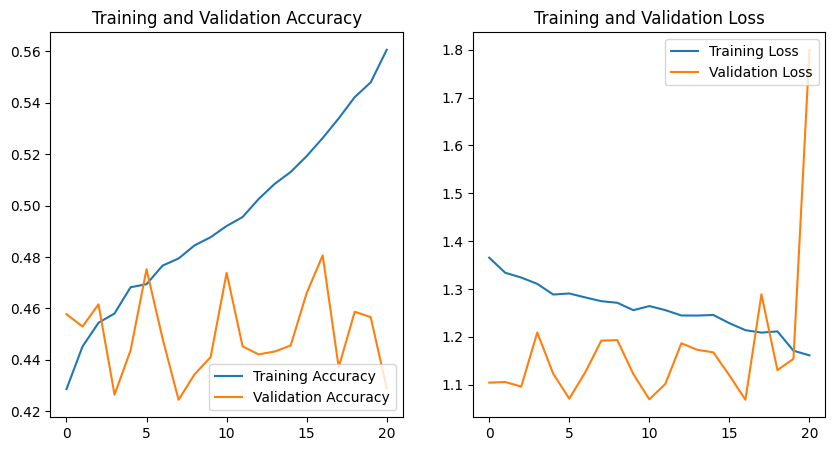

In [ ]:
import keras
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import torch
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import MobileNetV3Small, MobileNetV3Large
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
# from tensorflow.keras.applications import ResNet18
import matplotlib.pyplot as plt
from keras.applications.resnet import preprocess_input
from keras.applications.resnet import ResNet50
from keras.applications.resnet import ResNet101
from keras.applications.resnet import ResNet152

from keras.applications import VGG16
from keras.layers import Conv2D, Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D,Flatten, Dense, Dropout
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import torchvision.models as models

img_height = 168
img_width = 65

channels = 3
# batch_size=32

input_shape = (img_height, img_width, channels)


#Acquire the images from All__Images directory then input into Keras Libraray

def is_valid_file(filename):
    return not filename.endswith('.ipynb_checkpoints')



directory = '/content/drive/MyDrive/DM_Severity_Classification_augmented'
classes = [file for file in os.listdir(directory) if not  file.endswith('.ipynb_checkpoints') ]

ds  = tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='categorical',
    class_names=['Class_1', 'Class_2', 'Class_3', 'Class_4', 'Class_5'],
    color_mode='rgb',
    batch_size=32,   #batch size was changed from 32 to 8
    image_size=(img_height, img_width),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

 #extracting the 14250 from each file

#splitting the training set
train_size = int(0.8 * len(ds))
train_ds = ds.take(train_size)
test_ds = ds.skip(train_size)

#fitering out the DM and CG fies
print(ds.class_names)
# print(test_ds)
n_class = len(ds.class_names)


# increase the performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds  = test_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

#resize and rescale the value
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(img_height,img_width),
    tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255)
])


# #data augmentation has already been done


base_model = ResNet18()

model = tf.keras.Sequential([
        base_model,
        tf.keras.layers.Dropout(0.015),
   ])


# model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
loss_function = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
# metrics = ['accuracy']
metrics = ['accuracy',tf.metrics.Recall(), tf.metrics.Precision(),tf.metrics.AUC()]
model.compile(optimizer=optimizer, loss=loss_function, metrics=metrics)
model.build(input_shape)
model.summary()
# early stopping call back
early = tf.keras.callbacks.EarlyStopping( patience=10,
                                          min_delta=0.01,
                                          restore_best_weights=True)
# early stopping call back

ep = 50

# fit model
history = model.fit(train_ds,
                    validation_data=test_ds,
                    epochs=ep,
                    callbacks=[early])

end_epoch = len(history.history['loss'])
acc =  history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(end_epoch)



plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')


Tested on ResNEt18 model but the accuracy remains to be low, I will test it in a ResNet50 model

['Class_1', 'Class_2', 'Class_3', 'Class_5', 'Class_4']
Found 4041 files belonging to 5 classes.
this is one bacth shape (32, 168, 65, 3)
this is label shape  (32, 5)
94765736/94765736 [==============================] - 3s 0us/step
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 6, 3, 2048)        23587712  
                                                                 
 flatten_2 (Flatten)         (None, 36864)             0         
                                                                 
 dropout_3 (Dropout)         (None, 36864)             0         
                                                                 
 dense_4 (Dense)             (None, 5)                 184325    
                                                                 
Total params: 23772037 (90.68 MB)
Trainable params: 184325 (720.02 KB)
Non-trainable p

Text(0.5, 1.0, 'Training and Validation Loss')

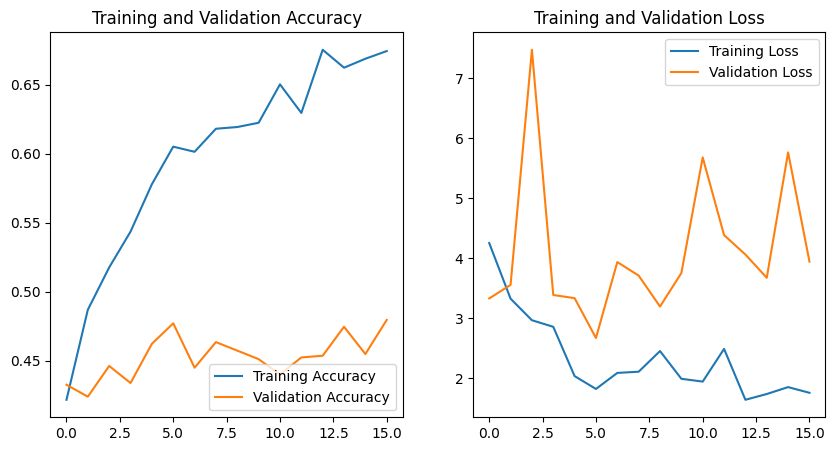

In [ ]:

import numpy as np
import pandas as pd
import os
import torch
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
# from tensorflow.keras.applications import InceptionV3
from keras.applications.resnet import preprocess_input
from keras.applications.resnet import ResNet50
from keras.applications.resnet import ResNet101
from keras.applications.resnet import ResNet152
# from tensorflow.keras.applications import ResNet18
from keras.applications import VGG16
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import torchvision.models as models

img_height = 168
img_width = 65

channels = 3
batch_size=32

input_shape = (img_height, img_width, channels)


#Acquire the images from All__Images directory then input into Keras Libraray

def is_valid_file(filename):
    return not filename.endswith('.ipynb_checkpoints')



directory = '/content/drive/MyDrive/DM_Severity_Classification_augmented_new'
classes = [file for file in os.listdir(directory) if not  file.endswith('.ipynb_checkpoints') ]
print(classes)


ds  = tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='categorical',
    class_names=['Class_1', 'Class_2', 'Class_3', 'Class_4', 'Class_5'],
    color_mode='rgb',
    batch_size=32,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

#splitting the training set
train_size = int(0.8 * len(ds))
train_ds = ds.take(train_size)
test_ds = ds.skip(train_size)

#fitering out the DM and CG fies
# print(ds.class_names)
# print(test_ds)
# n_class = len(ds.class_names)

#convert simple form
# fetch 1 batch and 1 batch have 32 files
for image_batch, lable_batch in test_ds.take(1):
  print('this is one bacth shape',image_batch.shape)
  print('this is label shape ',lable_batch.shape)


# for image_batch, lable_batch in test_ds.take(1):
#   print(image_batch.numpy())
#   print('\n')
#   print(lable_batch.numpy())

#increase the performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds  = test_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

#resize and rescale the value
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(img_height,img_width),
    tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255)
])


#data augmentation has already been done

#Creating the model

base_model = ResNet50(input_shape=input_shape, include_top=False, weights='imagenet')
base_model.trainable = False


input_shape = (32, img_height, img_width, 3)
# Create a custom model and add that model here
model = Sequential()
# model.add(resize_and_rescale)
# Add the base model as a layer
model.add(base_model)
model.add(Flatten())
# # Add custom layers on top of the base model
# model.add(Conv2D(16,kernel_size=(3,3),padding='same', activation='relu',input_shape=input_shape))
# model.add(Conv2D(32,kernel_size=(3,3),padding='same', activation='relu'))
# model.add(MaxPooling2D(pool_size=(1, 1)))
# model.add(Conv2D(64,kernel_size=(3,3),padding='same', activation='relu'))
# model.add(MaxPooling2D(pool_size=(1, 1)))
# model.add(Dense(128,activation='relu'))
# model.add(MaxPooling2D(pool_size=(1, 1)))
# model.add(Dense(64,activation='relu'))
# model.add(MaxPooling2D(pool_size=(1, 1)))
# model.add(Dense(32,activation='relu'))
# model.add(MaxPooling2D(pool_size=(1, 1)))
# model.add(Flatten())
model.add(Dropout(0.10))
model.add(Dense(5, activation='softmax'))


# model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
loss_function = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
# metrics = ['accuracy']
metrics = ['accuracy',tf.metrics.Recall(), tf.metrics.Precision(),tf.metrics.AUC()]
model.compile(optimizer=optimizer, loss=loss_function, metrics=metrics)
model.build(input_shape)
model.summary()

# early stopping call back
early = tf.keras.callbacks.EarlyStopping( patience=10,
                                          min_delta=0.001,
                                          restore_best_weights=True)
# early stopping call back

ep = 50

# fit model
history = model.fit(train_ds,
                    validation_data=test_ds,
                    epochs=ep,
                    callbacks=[early])

end_epoch = len(history.history['loss'])
acc =  history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(end_epoch)



plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')









# # Usage
# data_df = ALL_DATA
# img_height = 168
# img_width = 65
# n_classes = 2  # Replace with the actual number of classes
# batch_size = 32
# epochs = 10

# model, history = train_custom_model(data_df, img_height, img_width, n_classes, batch_size, epochs)


ResNet50 accuracy is lowe. Let's use a ResNet101

In [ ]:

import numpy as np
import pandas as pd
import os
import torch
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
# from tensorflow.keras.applications import InceptionV3
from keras.applications.resnet import preprocess_input
from keras.applications.resnet import ResNet50
from keras.applications.resnet import ResNet101
from keras.applications.resnet import ResNet152
# from tensorflow.keras.applications import ResNet18
from keras.applications import VGG16
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import torchvision.models as models

img_height = 168
img_width = 65

channels = 3
batch_size=32

input_shape = (img_height, img_width, channels)


#Acquire the images from All__Images directory then input into Keras Libraray

def is_valid_file(filename):
    return not filename.endswith('.ipynb_checkpoints')



directory = '/content/drive/MyDrive/DM_Severity_Classification_augmented_new'
classes = [file for file in os.listdir(directory) if not  file.endswith('.ipynb_checkpoints') ]
print(classes)


ds  = tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='categorical',
    class_names=['Class_1', 'Class_2', 'Class_3', 'Class_4', 'Class_5'],
    color_mode='rgb',
    batch_size=32,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

#splitting the training set
train_size = int(0.8 * len(ds))
train_ds = ds.take(train_size)
test_ds = ds.skip(train_size)

#fitering out the DM and CG fies
# print(ds.class_names)
# print(test_ds)
# n_class = len(ds.class_names)

#convert simple form
# fetch 1 batch and 1 batch have 32 files
for image_batch, lable_batch in test_ds.take(1):
  print('this is one bacth shape',image_batch.shape)
  print('this is label shape ',lable_batch.shape)


# for image_batch, lable_batch in test_ds.take(1):
#   print(image_batch.numpy())
#   print('\n')
#   print(lable_batch.numpy())

#increase the performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds  = test_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

#resize and rescale the value
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(img_height,img_width),
    tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255)
])


#data augmentation has already been done

#Creating the model

base_model = ResNet101(input_shape=input_shape, include_top=False, weights='imagenet')
base_model.trainable = False


input_shape = (32,img_height, img_width, 3)
# Create a custom model and add that model here
model = Sequential()
# model.add(resize_and_rescale)
# Add the base model as a layer
model.add(base_model)
model.add(Flatten())
# Add custom layers on top of the base model
# model.add(Conv2D(16,kernel_size=(3,3),padding='same', activation='relu',input_shape=input_shape))
# model.add(Conv2D(32,kernel_size=(3,3),padding='same', activation='relu'))
# model.add(MaxPooling2D(pool_size=(1, 1)))
# model.add(Conv2D(64,kernel_size=(3,3),padding='same', activation='relu'))
# model.add(MaxPooling2D(pool_size=(1, 1)))
# model.add(Dense(128,activation='relu'))
# model.add(MaxPooling2D(pool_size=(1, 1)))
# model.add(Dense(64,activation='relu'))
# model.add(MaxPooling2D(pool_size=(1, 1)))
# model.add(Dense(32,activation='relu'))
# model.add(MaxPooling2D(pool_size=(1, 1)))
# model.add(Flatten())
model.add(Dropout(0.10))
model.add(Dense(5, activation='softmax'))


# model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
loss_function = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
# metrics = ['accuracy']
metrics = ['accuracy',tf.metrics.Recall(), tf.metrics.Precision(),tf.metrics.AUC()]
model.compile(optimizer=optimizer, loss=loss_function, metrics=metrics)
model.build(input_shape)
model.summary()

# early stopping call back
early = tf.keras.callbacks.EarlyStopping( patience=10,
                                          min_delta=0.001,
                                          restore_best_weights=True)
# early stopping call back

ep = 50

# fit model
history = model.fit(train_ds,
                    validation_data=test_ds,
                    epochs=ep,
                    callbacks=[early])

end_epoch = len(history.history['loss'])
acc =  history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(end_epoch)



plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')









# # Usage
# data_df = ALL_DATA
# img_height = 168
# img_width = 65
# n_classes = 2  # Replace with the actual number of classes
# batch_size = 32
# epochs = 10

# model, history = train_custom_model(data_df, img_height, img_width, n_classes, batch_size, epochs)


ResNet152

In [ ]:

import numpy as np
import pandas as pd
import os
import torch
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
# from tensorflow.keras.applications import InceptionV3
from keras.applications.resnet import preprocess_input
from keras.applications.resnet import ResNet50
from keras.applications.resnet import ResNet101
from keras.applications.resnet import ResNet152
# from tensorflow.keras.applications import ResNet18
from keras.applications import VGG16
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import torchvision.models as models

img_height = 168
img_width = 65

channels = 3
batch_size=32

input_shape = (img_height, img_width, channels)


#Acquire the images from All__Images directory then input into Keras Libraray

def is_valid_file(filename):
    return not filename.endswith('.ipynb_checkpoints')



directory = '/content/drive/MyDrive/DM_Severity_Classification_augmented'
classes = [file for file in os.listdir(directory) if not  file.endswith('.ipynb_checkpoints') ]
print(classes)


ds  = tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='categorical',
    class_names=['Class_1', 'Class_2', 'Class_3', 'Class_4', 'Class_5'],
    color_mode='rgb',
    batch_size=32,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

#splitting the training set
train_size = int(0.8 * len(ds))
train_ds = ds.take(train_size)
test_ds = ds.skip(train_size)

#fitering out the DM and CG fies
# print(ds.class_names)
# print(test_ds)
# n_class = len(ds.class_names)

#convert simple form
# fetch 1 batch and 1 batch have 32 files
for image_batch, lable_batch in test_ds.take(1):
  print('this is one bacth shape',image_batch.shape)
  print('this is label shape ',lable_batch.shape)


# for image_batch, lable_batch in test_ds.take(1):
#   print(image_batch.numpy())
#   print('\n')
#   print(lable_batch.numpy())

#increase the performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds  = test_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

#resize and rescale the value
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(img_height,img_width),
    tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255)
])


#data augmentation has already been done

#Creating the model

base_model = ResNet18(input_shape=input_shape, include_top=False, weights='imagenet')
base_model.trainable = False


input_shape = (32,img_height, img_width, 3)
# Create a custom model and add that model here
model = Sequential()
# model.add(resize_and_rescale)
# Add the base model as a layer
model.add(base_model)
model.add(Flatten())
# Add custom layers on top of the base model
# model.add(Conv2D(16,kernel_size=(3,3),padding='same', activation='relu',input_shape=input_shape))
# model.add(Conv2D(32,kernel_size=(3,3),padding='same', activation='relu'))
# model.add(MaxPooling2D(pool_size=(1, 1)))
# model.add(Conv2D(64,kernel_size=(3,3),padding='same', activation='relu'))
# model.add(MaxPooling2D(pool_size=(1, 1)))
# model.add(Dense(128,activation='relu'))
# model.add(MaxPooling2D(pool_size=(1, 1)))
# model.add(Dense(64,activation='relu'))
# model.add(MaxPooling2D(pool_size=(1, 1)))
# model.add(Dense(32,activation='relu'))
# model.add(MaxPooling2D(pool_size=(1, 1)))
# model.add(Flatten())
model.add(Dropout(0.10))
model.add(Dense(5, activation='softmax'))


# model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
loss_function = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
# metrics = ['accuracy']
metrics = ['accuracy',tf.metrics.Recall(), tf.metrics.Precision(),tf.metrics.AUC()]
model.compile(optimizer=optimizer, loss=loss_function, metrics=metrics)
model.build(input_shape)
model.summary()

# early stopping call back
early = tf.keras.callbacks.EarlyStopping( patience=10,
                                          min_delta=0.001,
                                          restore_best_weights=True)
# early stopping call back

ep = 50

# fit model
history = model.fit(train_ds,
                    validation_data=test_ds,
                    epochs=ep,
                    callbacks=[early])

end_epoch = len(history.history['loss'])
acc =  history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(end_epoch)



plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')









# # Usage
# data_df = ALL_DATA
# img_height = 168
# img_width = 65
# n_classes = 2  # Replace with the actual number of classes
# batch_size = 32
# epochs = 10

# model, history = train_custom_model(data_df, img_height, img_width, n_classes, batch_size, epochs)


['Class_1', 'Class_2', 'Class_4', 'Class_3', 'Class_5']
Found 72827 files belonging to 5 classes.
this is one bacth shape (32, 168, 65, 3)
this is label shape  (32, 5)


TypeError: ResNet18() got an unexpected keyword argument 'include_top'